In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("artelingo28_train_final.csv")
ds

,genre,emotion,caption,art_style,painting,language
0,genre_painting,awe,"""စိတ္တဇပန်းချီဆန်ဆန်ပန်းချီကားလေးမှာ အမျိုးသမီ...",Expressionism,edvard-munch_children-in-the-street-1915,Burmese
1,landscape,contentment,"""မြစ်ချောင်းနံဘေးက နှစ်ထပ်အိမ်လေးရယ်၊ အရိပ်ရတဲ...",Impressionism,hoca-ali-riza_sanat-detay,Burmese
2,religious_painting,disgust,"""ခေါင်းဖြတ်သတ်တဲ့ အလုပ်ကို ဘယ်လိုမှမခံစားရပုံပ...",Northern_Renaissance,albrecht-altdorfer_beheading-of-john-the-bapti...,Burmese
3,religious_painting,sadness,"""ပရိဒေဝမီးတောက်လောင်ပုံပေါ်နေသည့် သားအမိ "" 692",Early_Renaissance,giovanni-bellini_madonna-with-child-1455,Burmese
4,religious_painting,contentment,"""လောကီကိုပယ်ပြီး လောကုတ္တရာတရားကျင့်ရန် တောတော...",Symbolism,nicholas-roerich_red-lama-1924,Burmese
...,...,...,...,...,...,...
154223,cityscape,other,"""Para tukang sedang melakukan proses pembangun...",Pointillism,giacomo-balla_a-worker-s-day-1904,Indonesian
154224,portrait,contentment,"""Wajah tampan seorang seniman dan politisi Pol...",Romanticism,orest-kiprensky_portrait-of-adam-mickiewicz-1825,Indonesian
154225,abstract_painting,excitement,"""Coretan abstrak dengan aneka ragam warna sehi...",Abstract_Expressionism,sam-francis_untitled-from-pasadena-box-1963-1,Indonesian
154226,abstract_painting,other,"""Sebuah bingkai hitam dengan isian warna abu-a...",Minimalism,jo-baer_untitled-1968,Indonesian


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154228 entries, 0 to 154227
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   genre      154228 non-null  object
 1   emotion    154228 non-null  object
 2   caption    154228 non-null  object
 3   art_style  154228 non-null  object
 4   painting   154228 non-null  object
 5   language   154228 non-null  object
dtypes: object(6)
memory usage: 7.1+ MB


In [5]:
ds.describe()

,genre,emotion,caption,art_style,painting,language
count,154228,154228,154228,154228,154228,154228
unique,9,10,150913,27,1658,25
top,portrait,contentment,Kiri otteliua murima muaha wa conniaca yookiss...,Impressionism,pyotr-konchalovsky_portrait-of-the-singer-zara...,Tagalog
freq,35795,45193,505,28337,114,8338


In [38]:
ds.isna().sum()

genre        0
emotion      0
caption      0
art_style    0
painting     0
language     0
dtype: int64

In [6]:
ds.columns

Index(['genre', 'emotion', 'caption', 'art_style', 'painting', 'language'], dtype='object')

### Univariant 

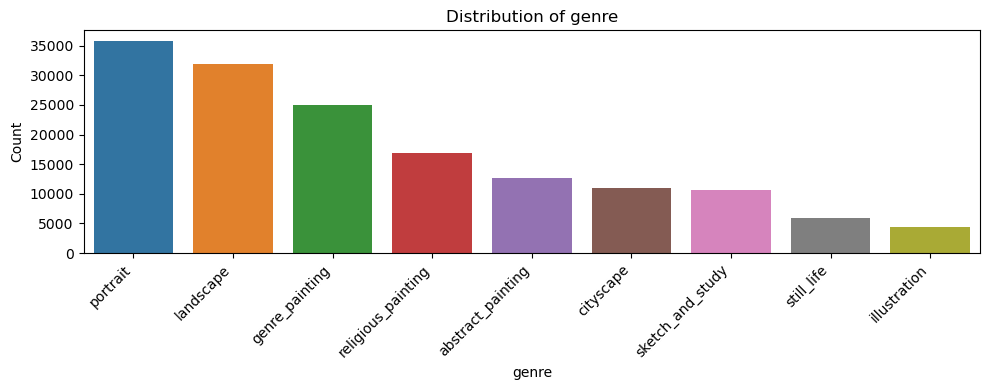

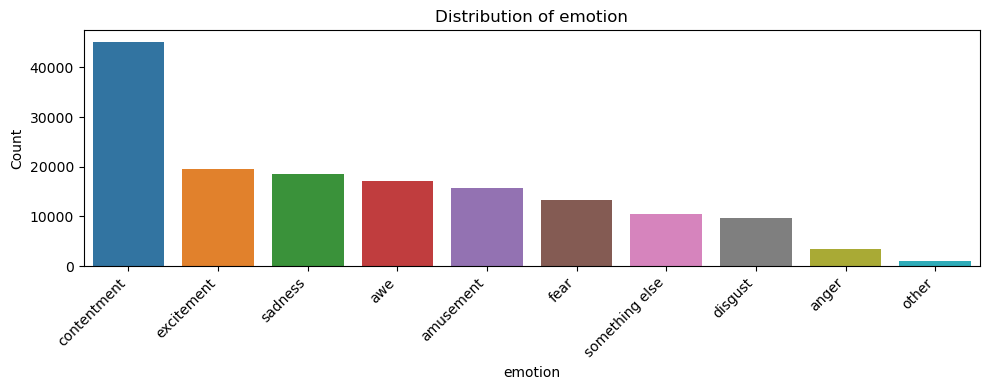

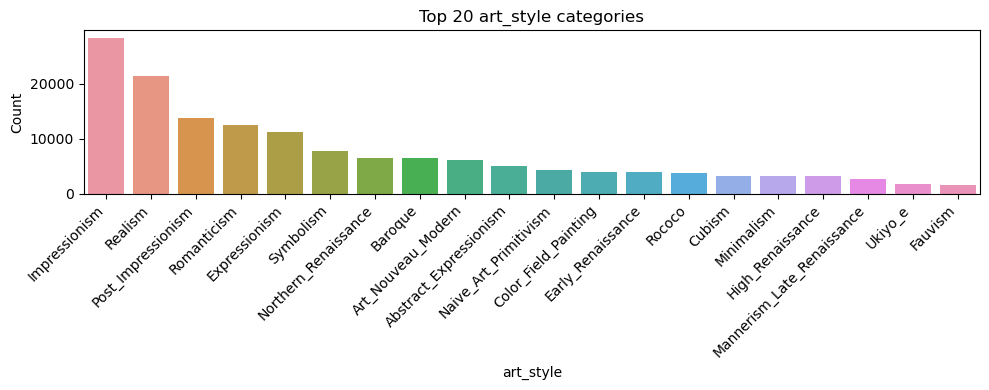

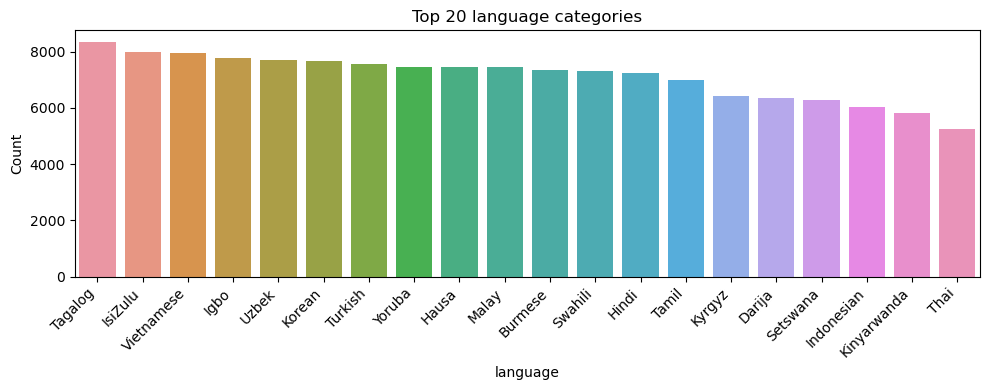

In [15]:
categorical_features = ['genre', 'emotion', 'art_style', 'language']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    if ds[col].nunique() > 20:
        top_categories = ds[col].value_counts().nlargest(20)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f"Top 20 {col} categories")
        plt.xticks(rotation=45, ha='right')
    else:
        sns.countplot(data=ds, x=col, order=ds[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45, ha='right')

    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [11]:
ds["genre"].value_counts()/len(ds) * 100

genre
portrait              23.209145
landscape             20.642815
genre_painting        16.166325
religious_painting    10.994113
abstract_painting      8.180097
cityscape              7.142672
sketch_and_study       6.928703
still_life             3.889047
illustration           2.847084
Name: count, dtype: float64

#### Genre:
- Portrait paintings are the most prevalent, contains 23.2% of the data
- The distribution is right-skewed so data is inbalance
- This imbalance might affect tasks like classification or clustering, as models could become biased toward the more frequent genres.

In [13]:
ds["emotion"].value_counts(normalize=True) * 100

emotion
contentment       29.302721
excitement        12.682522
sadness           12.065902
awe               11.110175
amusement         10.129808
fear               8.683897
something else     6.808751
disgust            6.335425
anger              2.174702
other              0.706097
Name: proportion, dtype: float64

#### Emotion:
- Contentment 29.3% is the most frequent emotion.
- The imbalance could lead to model bias toward contentment
- Anger is 2.2% of the data, people insihts and cultures are not very aggrresive towards paintings

In [14]:
ds["art_style"].value_counts(normalize=True) * 100

art_style
Impressionism                 18.373447
Realism                       13.937158
Post_Impressionism             8.880359
Romanticism                    8.104884
Expressionism                  7.300879
Symbolism                      4.984179
Northern_Renaissance           4.262520
Baroque                        4.250849
Art_Nouveau_Modern             3.918873
Abstract_Expressionism         3.242602
Naive_Art_Primitivism          2.762144
Color_Field_Painting           2.585782
Early_Renaissance              2.555956
Rococo                         2.434059
Cubism                         2.119589
Minimalism                     2.081983
High_Renaissance               2.024276
Mannerism_Late_Renaissance     1.681925
Ukiyo_e                        1.075680
Fauvism                        0.969992
Pop_Art                        0.809840
Pointillism                    0.540758
Contemporary_Realism           0.488887
New_Realism                    0.258708
Analytical_Cubism             

#### Art style:
- Impressionism 18.4% and Realism 13.9% together make up over 32% of the data.
- highly inbalance data
- Diversity Exists but is Sparse. There’s a rich variety (26 categories), but many styles such as Analytical Cubism (0.17%), Pop Art (0.81%), and Action Painting (0.06%) are extremely underrepresented.
- Models trained on this feature may overfit to dominant classes unless techniques like class balancing are used.

In [16]:
ds["language"].value_counts(normalize=True) * 100

language
Tagalog        5.406282
IsiZulu        5.175455
Vietnamese     5.162487
Igbo           5.036699
Uzbek          4.992608
Korean         4.973805
Turkish        4.910263
Yoruba         4.836346
Hausa          4.835049
Malay          4.829862
Burmese        4.772156
Swahili        4.745571
Hindi          4.702778
Tamil          4.529009
Kyrgyz         4.160723
Darija         4.111445
Setswana       4.066706
Indonesian     3.914983
Kinyarwanda    3.780766
Thai           3.403403
Urdu           2.067718
Kazakh         1.648858
IsiNdebele     1.403766
IsiXhosa       1.275384
Emakhuwa       1.257878
Name: proportion, dtype: float64

#### Language:
- The top three languages are: Tagalog 5.41%, IsiZulu 5.18% and Vietnamese 5.16%
- fairly balanced presence of diverse linguistic regions

### Bivariant

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function: Grouped Bar Plot (Countplot with hue)
def plot_countplot(df: pd.DataFrame, x: str, hue: str):
    plt.figure(figsize=(20, 12))
    ax = sns.countplot(data=df, x=x, hue=hue)
    ax.set_title(f"Count Plot: {hue} distribution within {x}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Function: Heatmap of cross-tabulation

def plot_heatmap(df: pd.DataFrame, x: str, y: str):
    ct = pd.crosstab(df[x], df[y])
    plt.figure(figsize=(20, 12))
    ax = sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
    ax.set_title(f"Heatmap: {x} vs {y}")
    ax.set_xlabel(y)
    ax.set_ylabel(x)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Function: Stacked Bar Chart (percentage)

def plot_stacked_bar(df: pd.DataFrame, x: str, y: str):
    ct = pd.crosstab(df[x], df[y], normalize='index') * 100
    ax = ct.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='tab20')
    ax.set_ylabel('Percentage')
    ax.set_title(f"Stacked Bar: % of {y} per {x}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title=y, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [31]:
# List of feature pairs to explore
feature_pairs = [
    ('genre', 'emotion'),
    ('genre', 'art_style'),
    ('language', 'genre'),
    ('art_style', 'emotion'),
    ('language', 'emotion')
]

# Loop through pairs and apply all plotting functions
def explore_bivariate(df: pd.DataFrame,x,y):
    print(f"\n-- Exploring: {x} vs {y} --")
    plot_countplot(df, x, y)
    plot_heatmap(df, x, y)
    plot_stacked_bar(df, x, y)

#### Genre vs Emotion


-- Exploring: genre vs emotion --


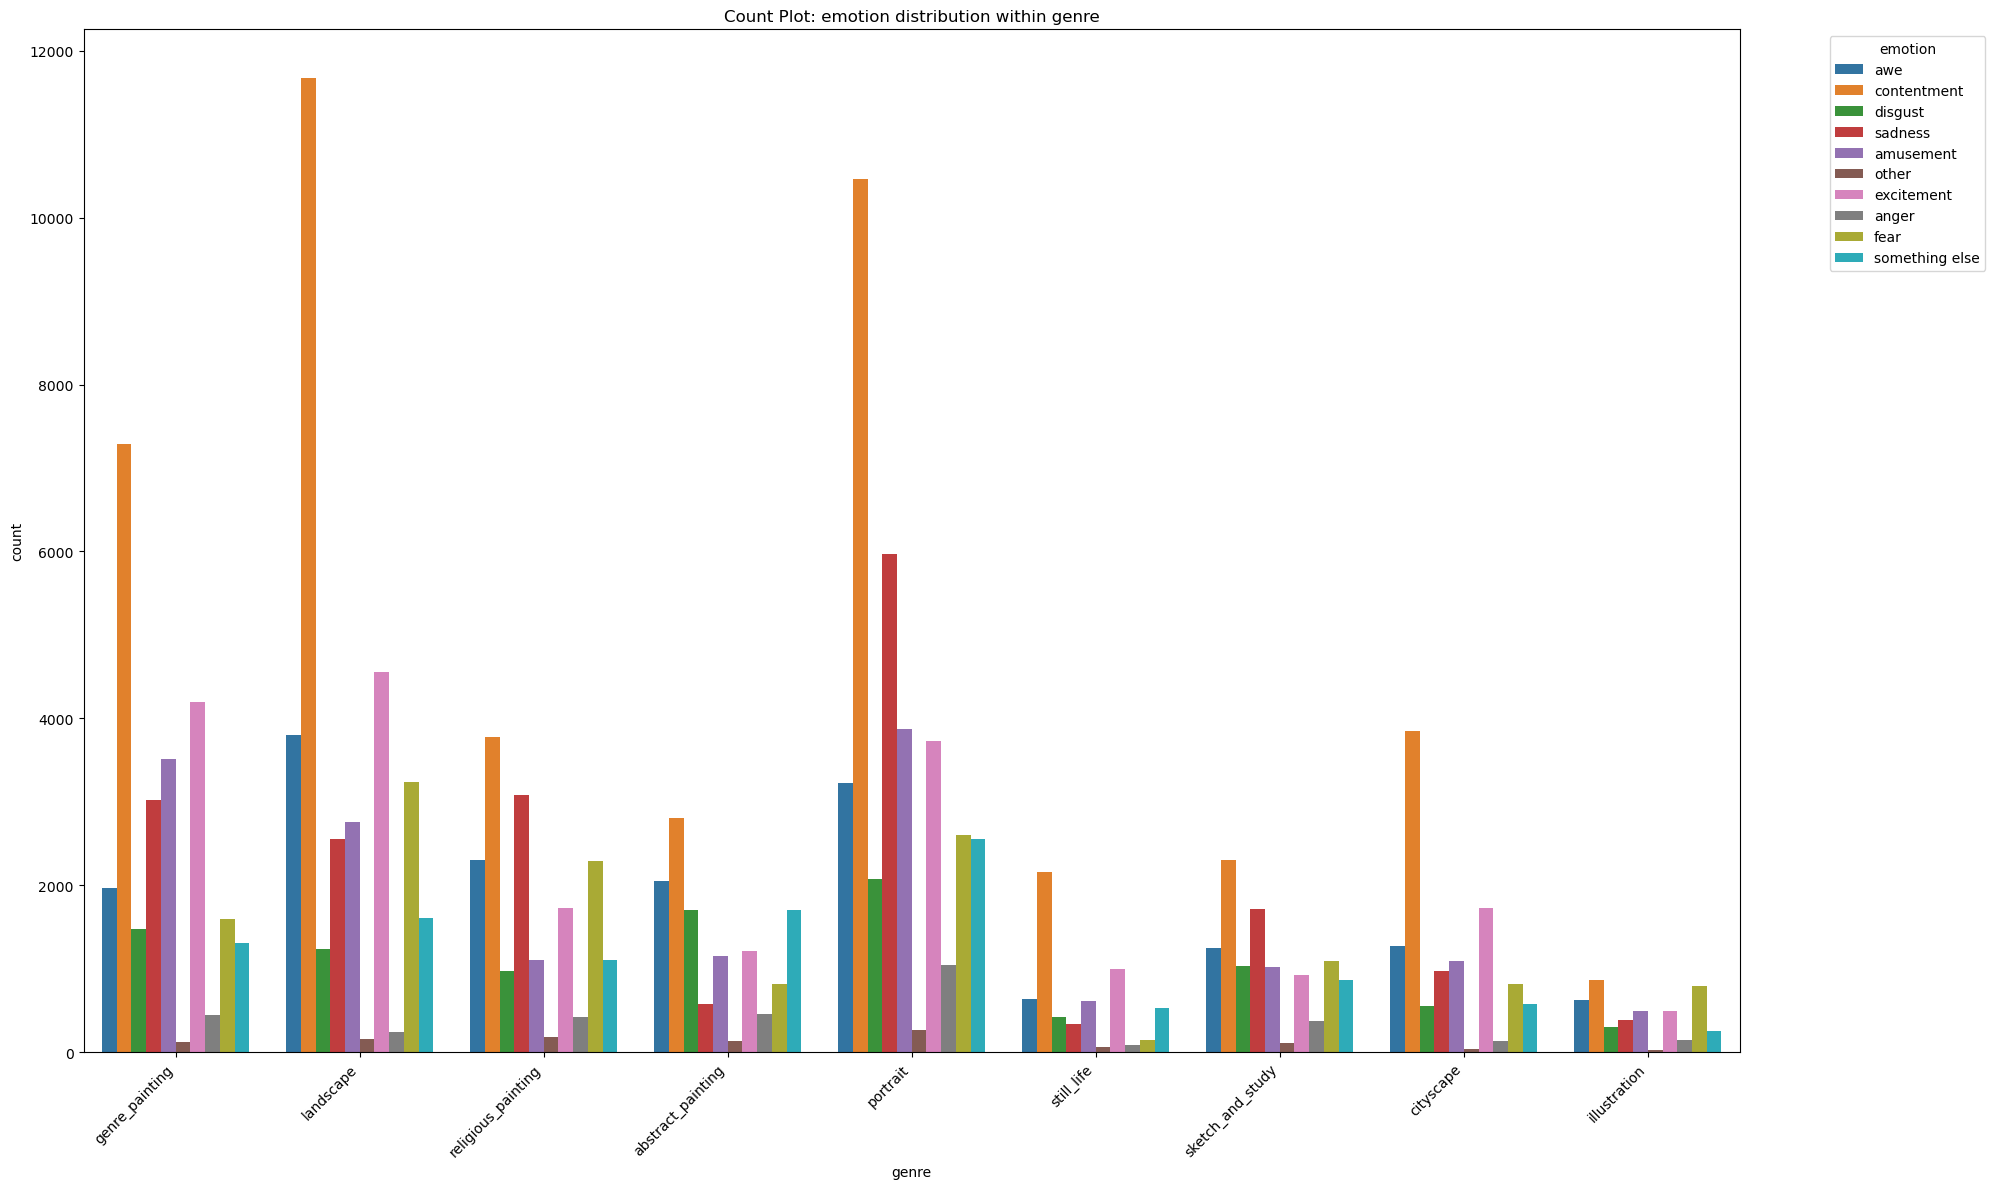

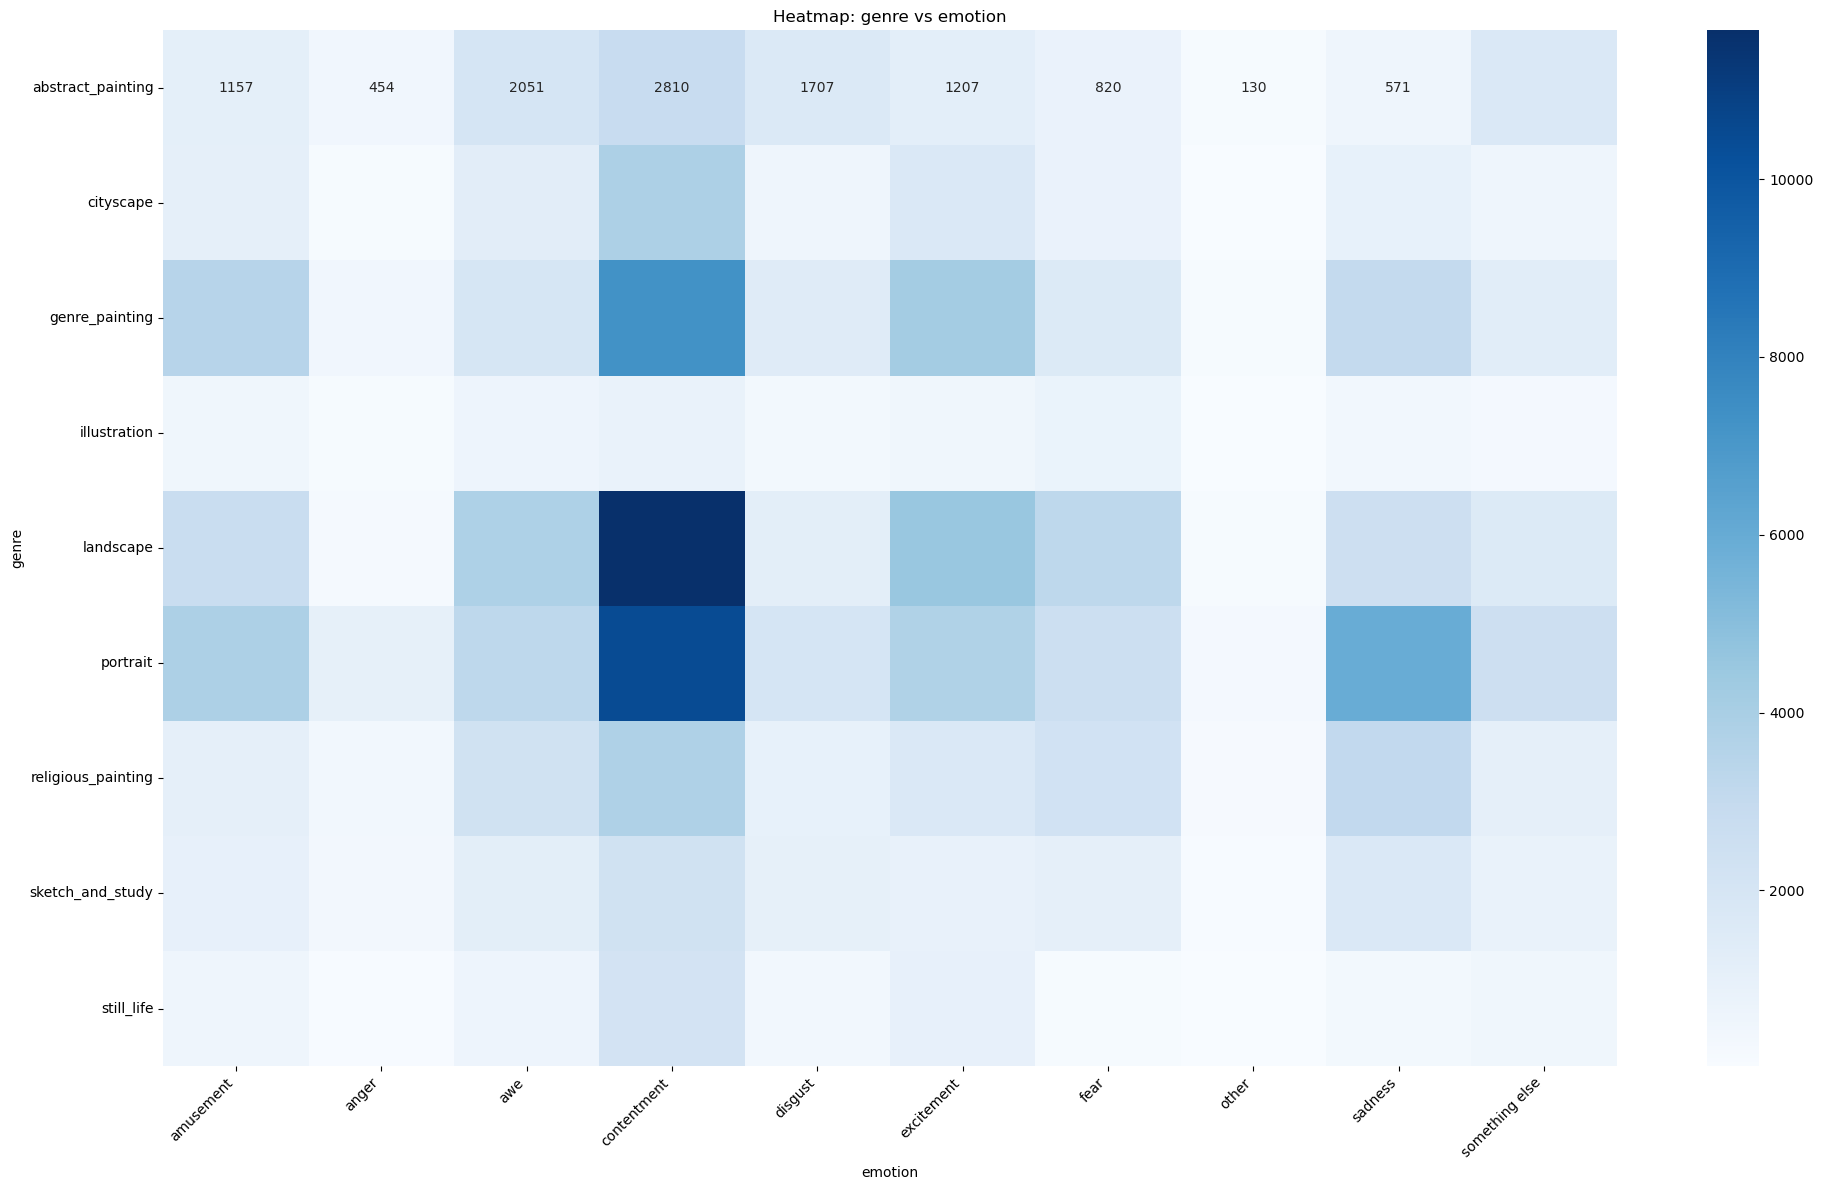

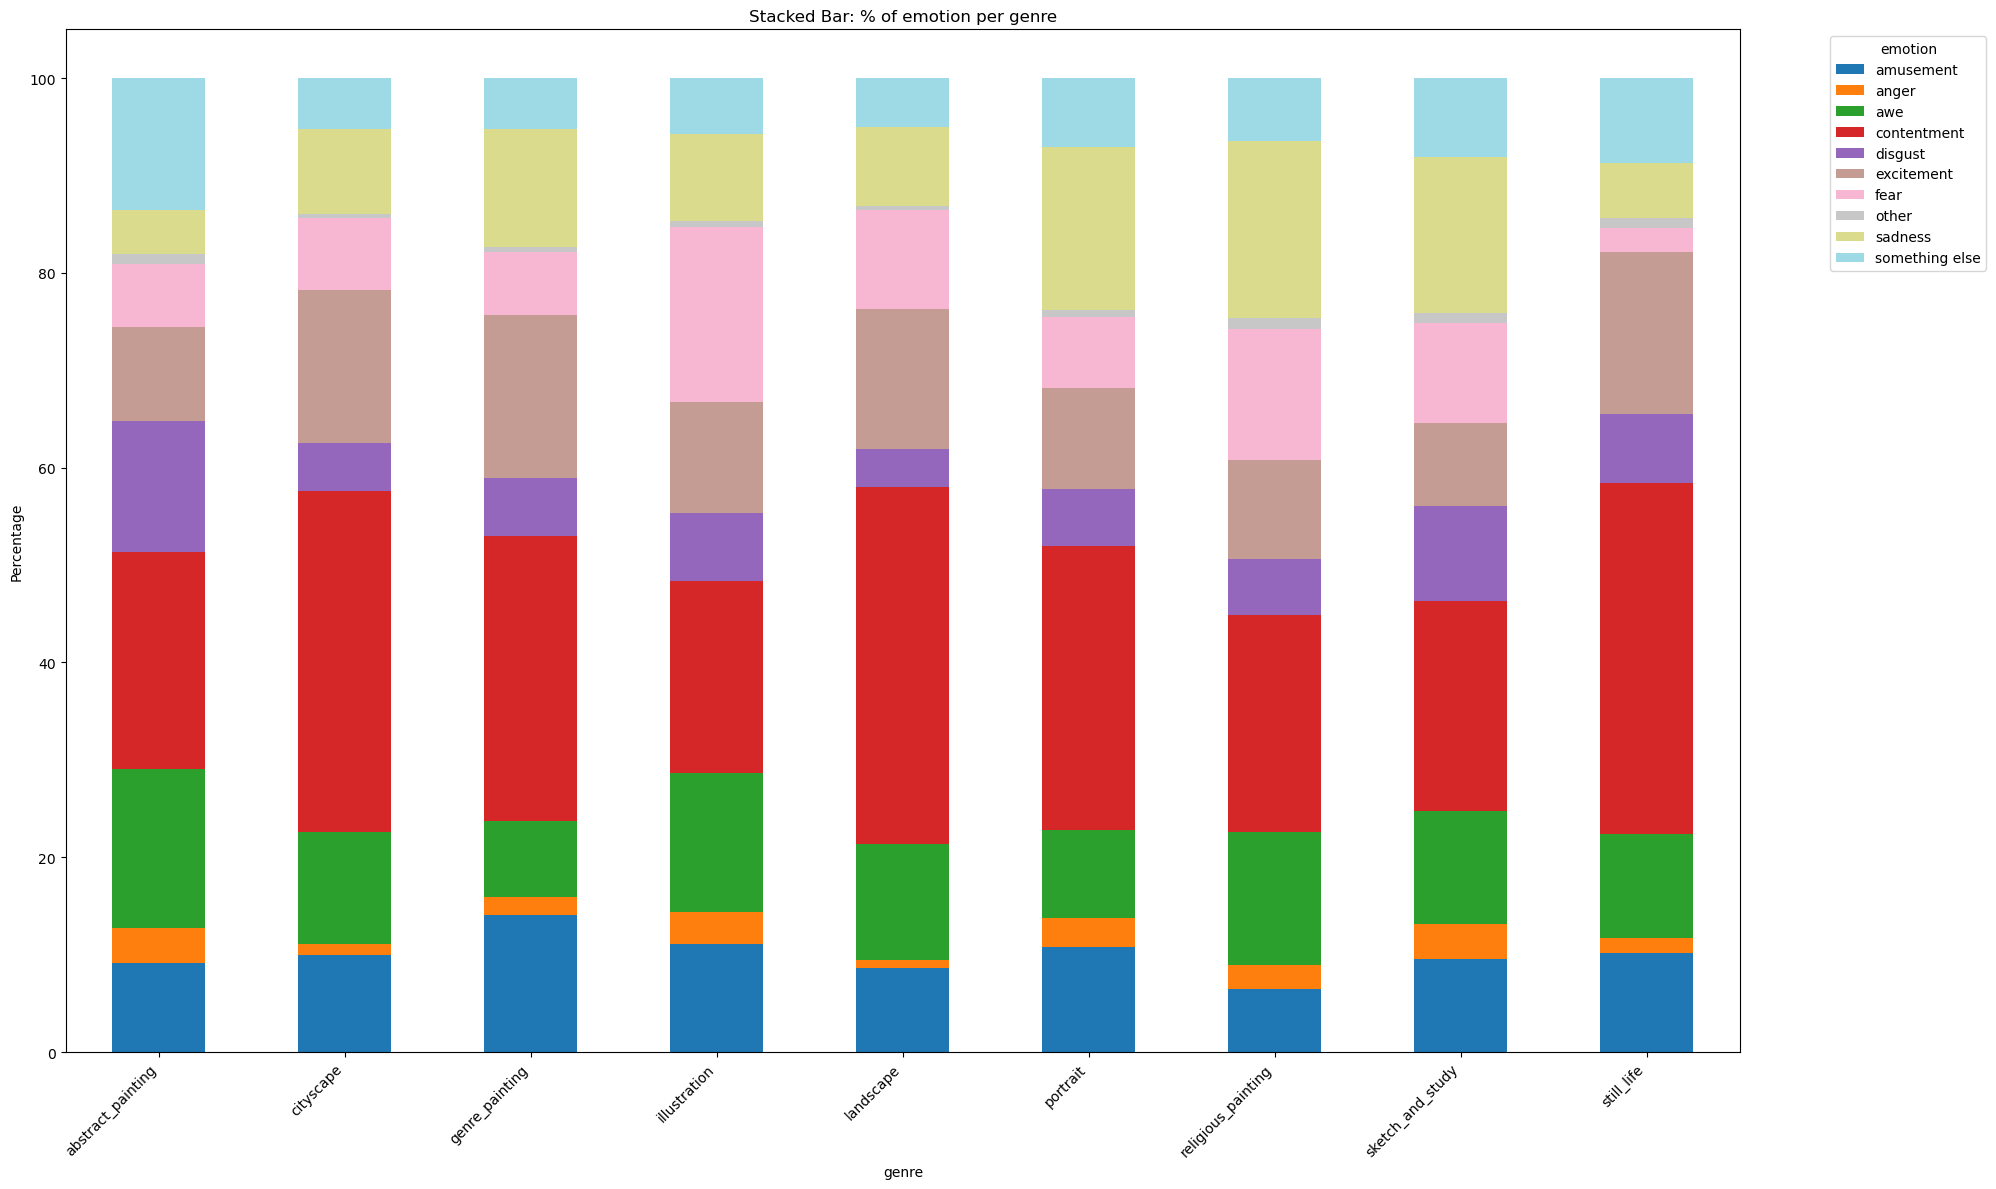

In [32]:
explore_bivariate(ds,'genre', 'emotion')

- In all generes , contentment is the most frequent emotion, makes dataset inbalance
   - contains 20% - 25%  of every genre
- Anger has the lowest count among emotions (after other)

#### Genre vs Art style


-- Exploring: genre vs art_style --


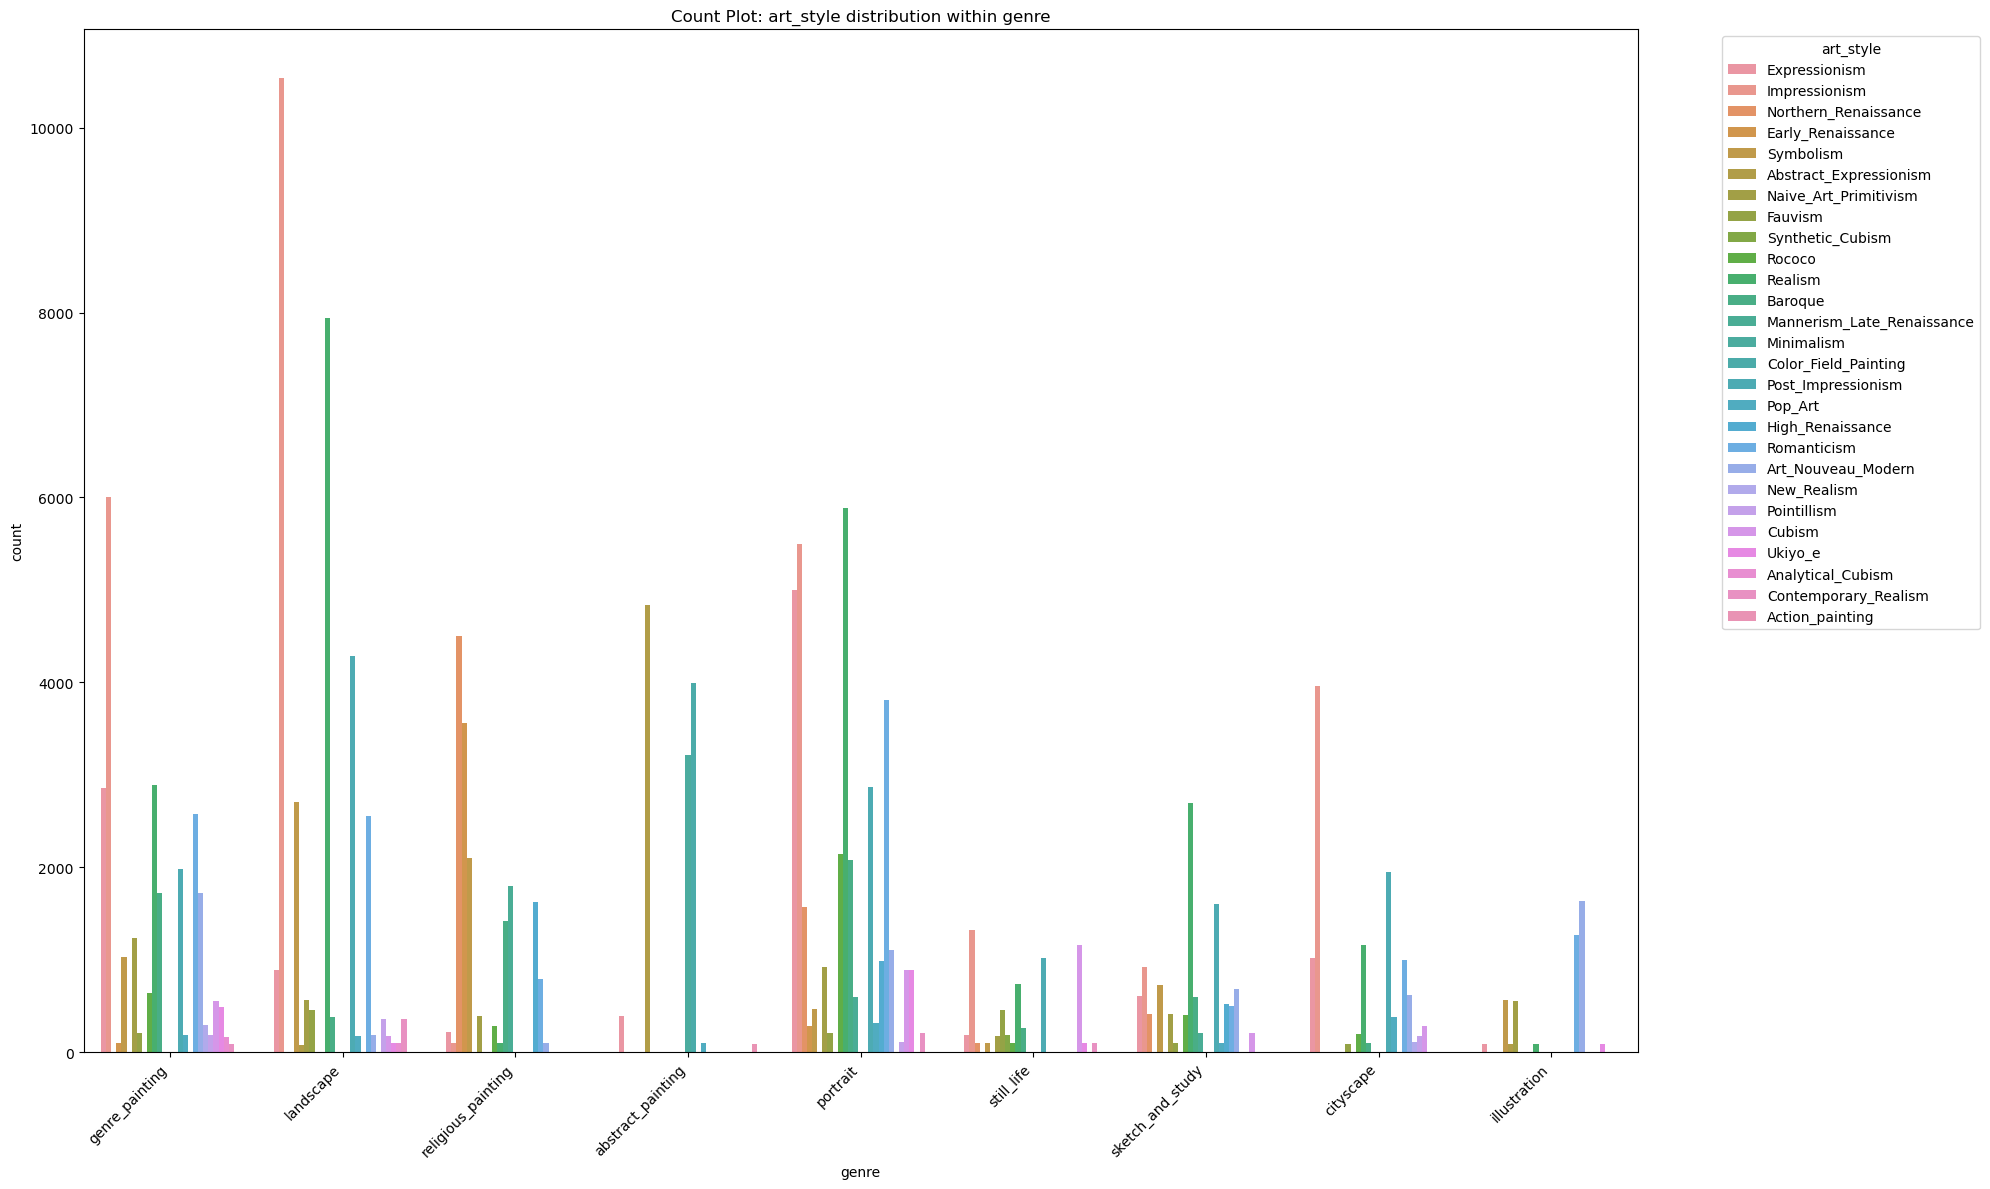

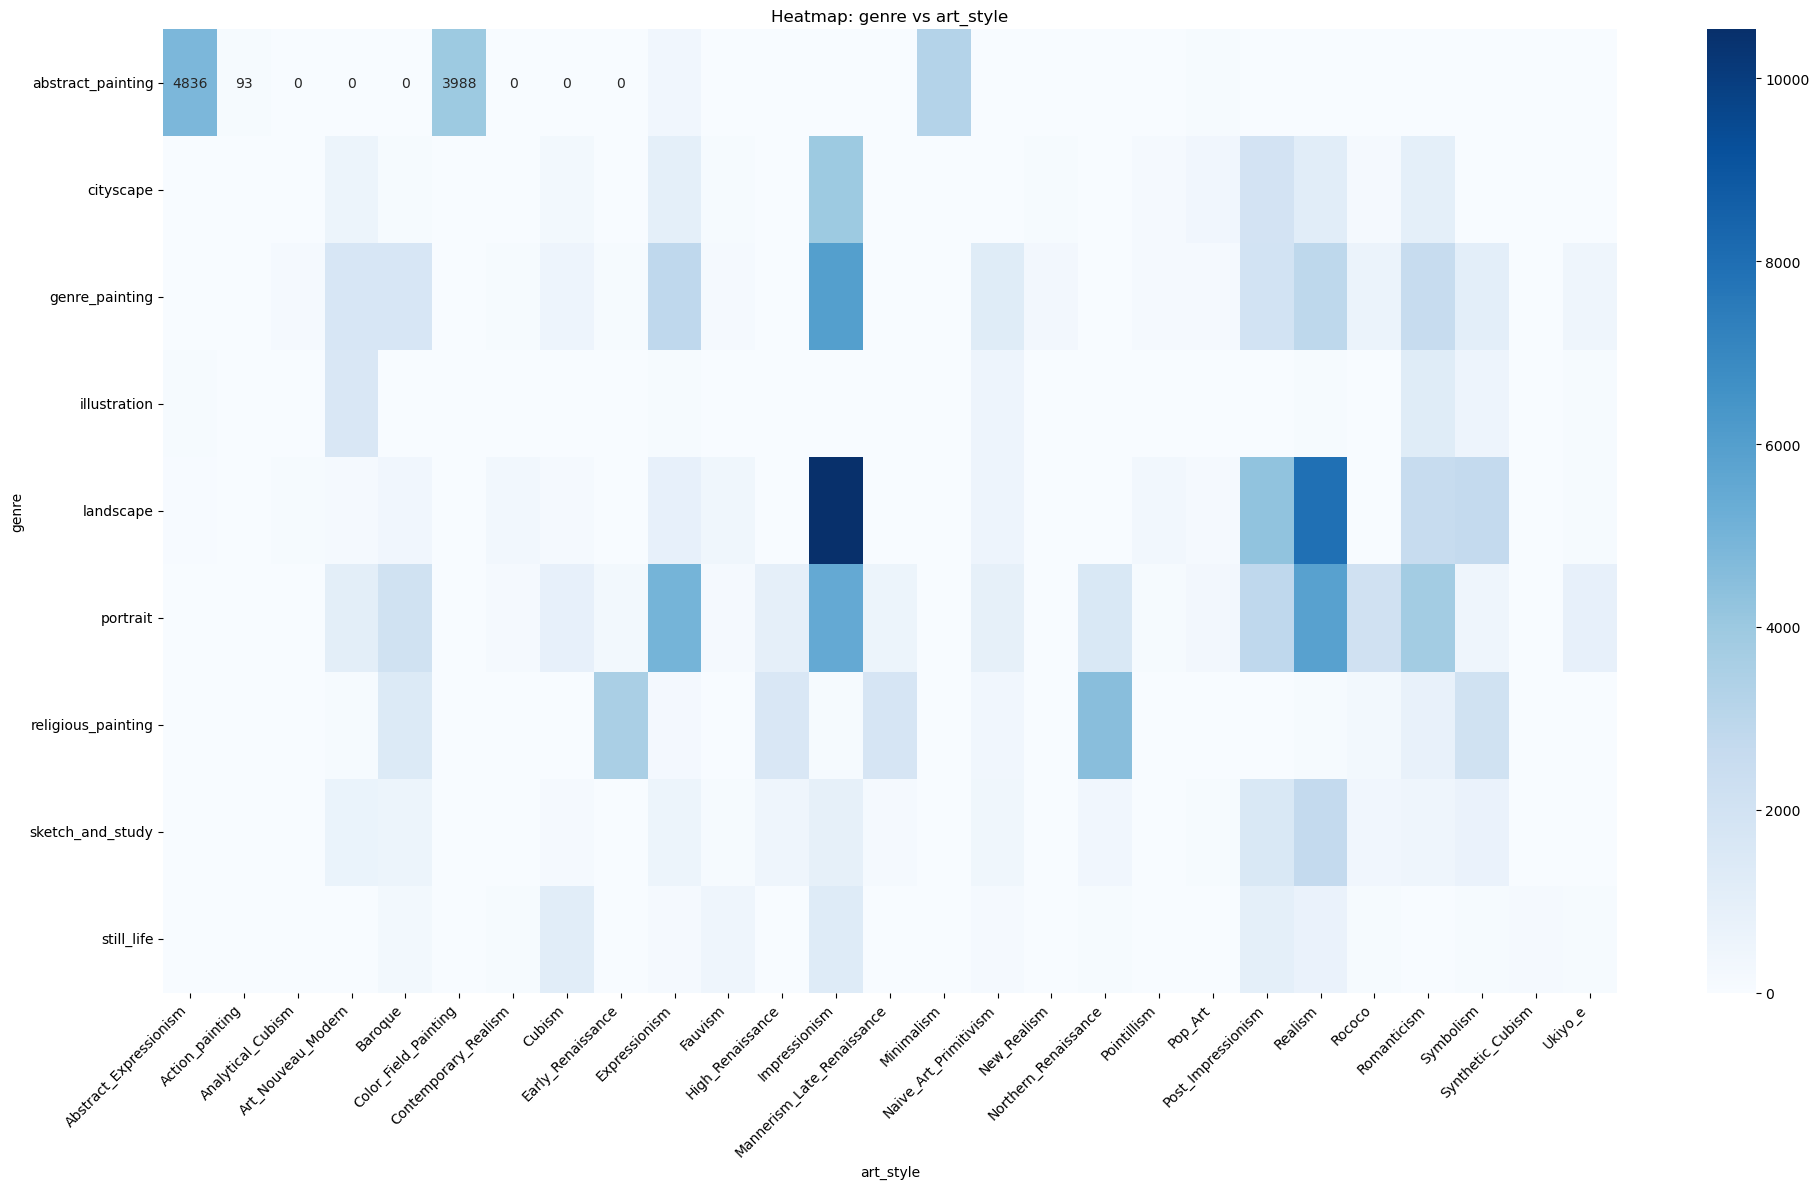

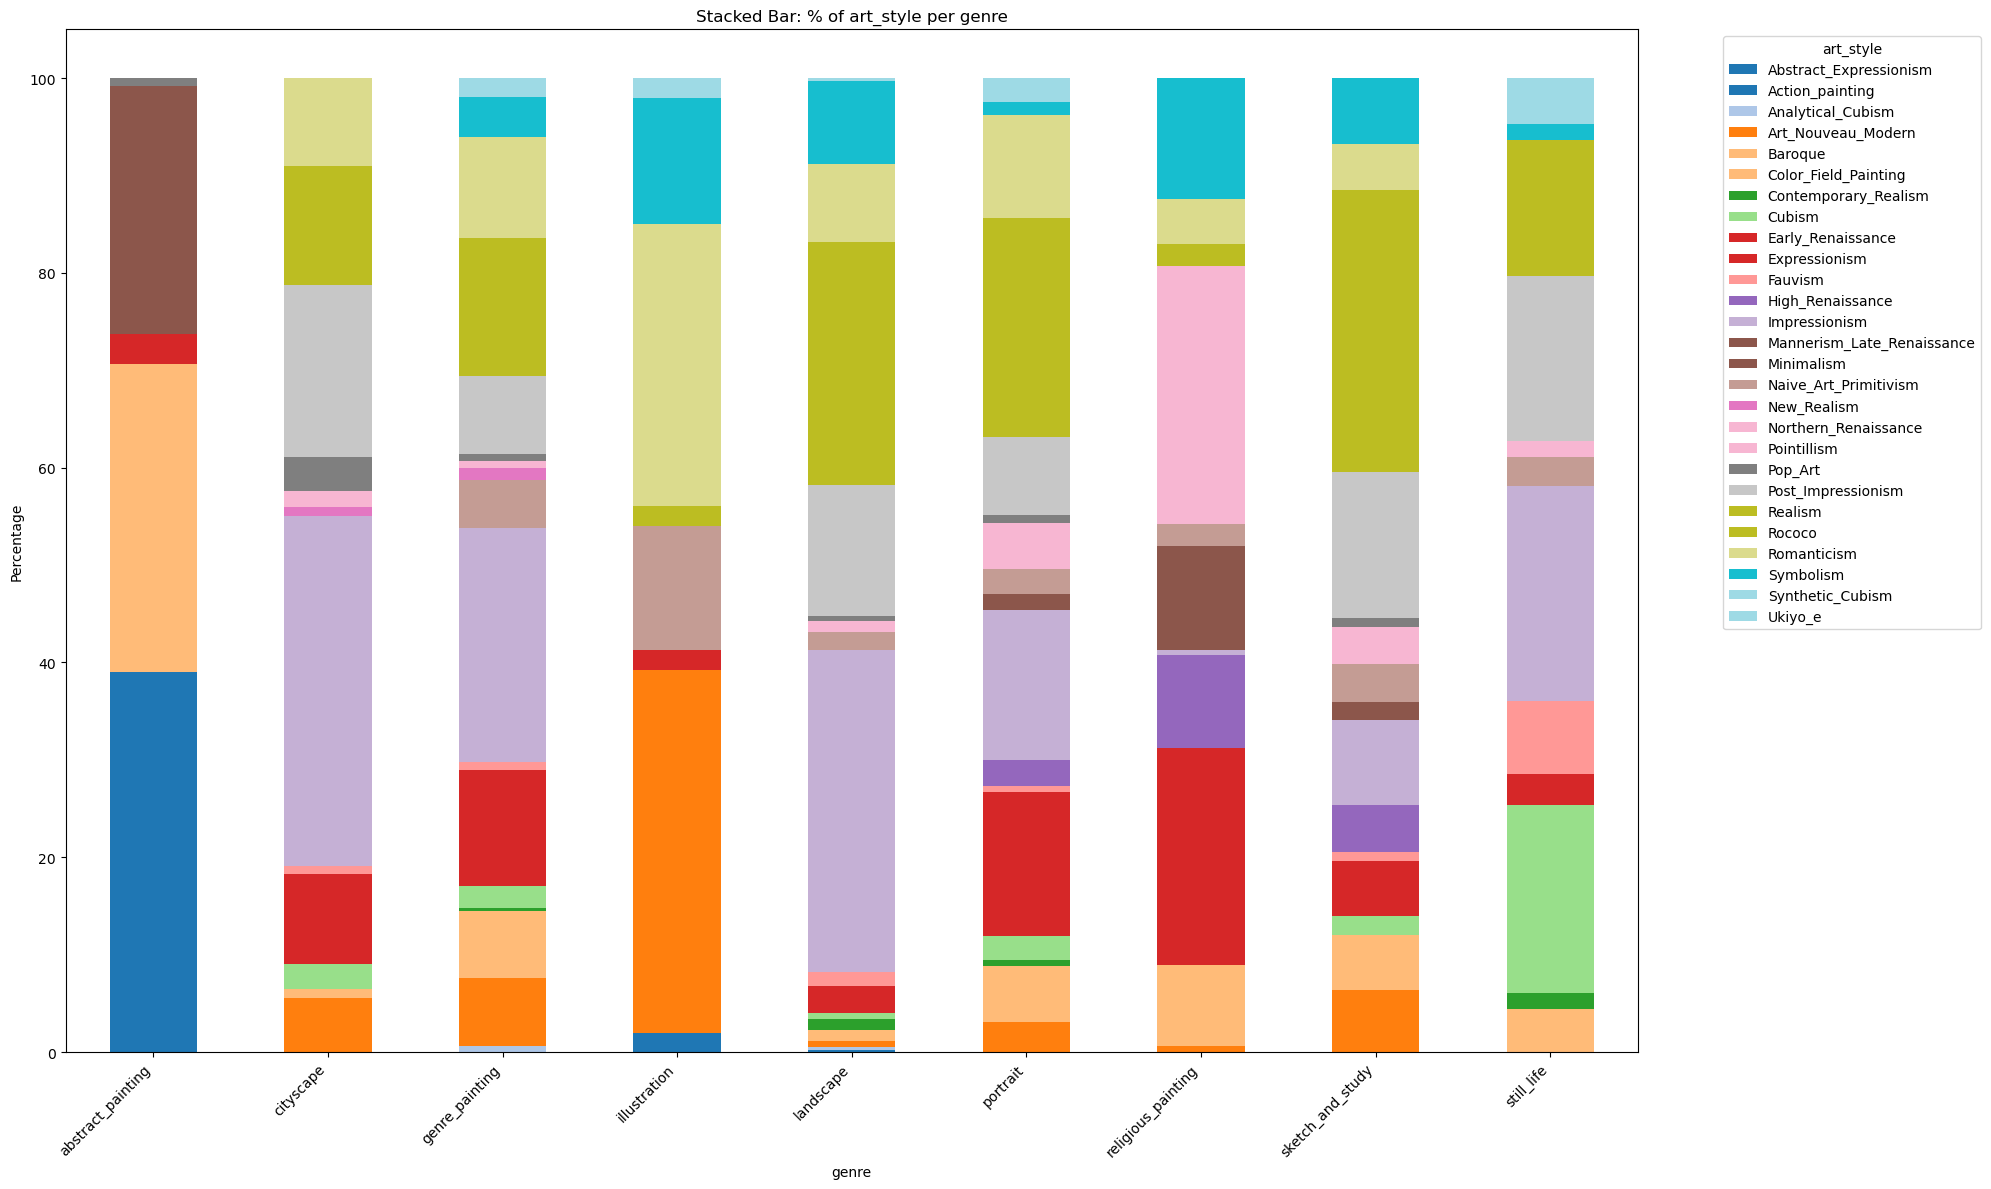

In [34]:
explore_bivariate(ds,'genre', 'art_style')

- Expressionism dominates genre_painting with a high count 

- This contributes to a notable imbalance in style distribution across genres. Expressionism is most commonly associated with genre_painting and abstract_painting images

- Baroque is the least represented style in abstract paintings (by percentage)

- Abstract paintings are most frequently associated with the Abstract Expressionism style category

#### Language vs Genre


-- Exploring: language vs genre --


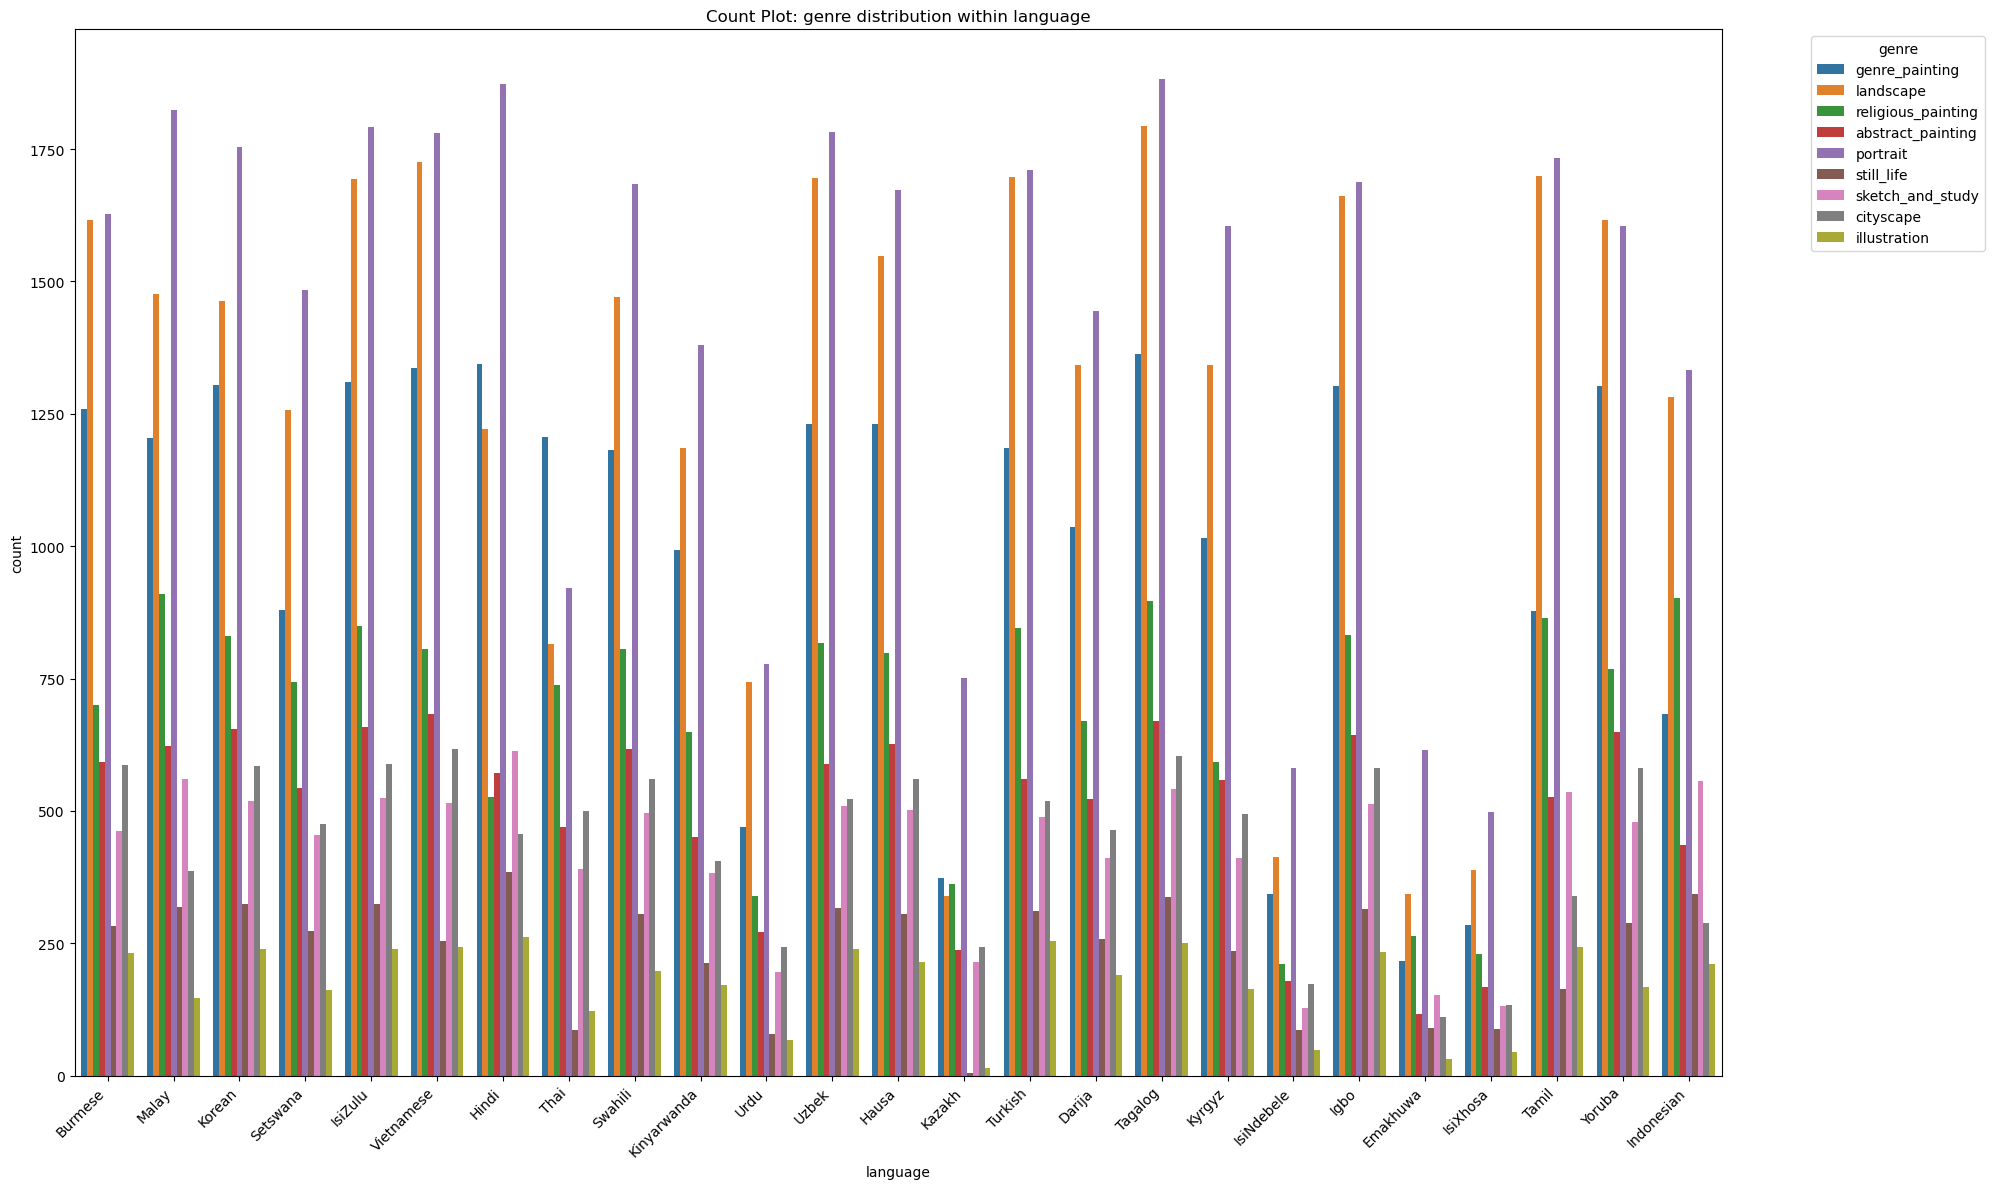

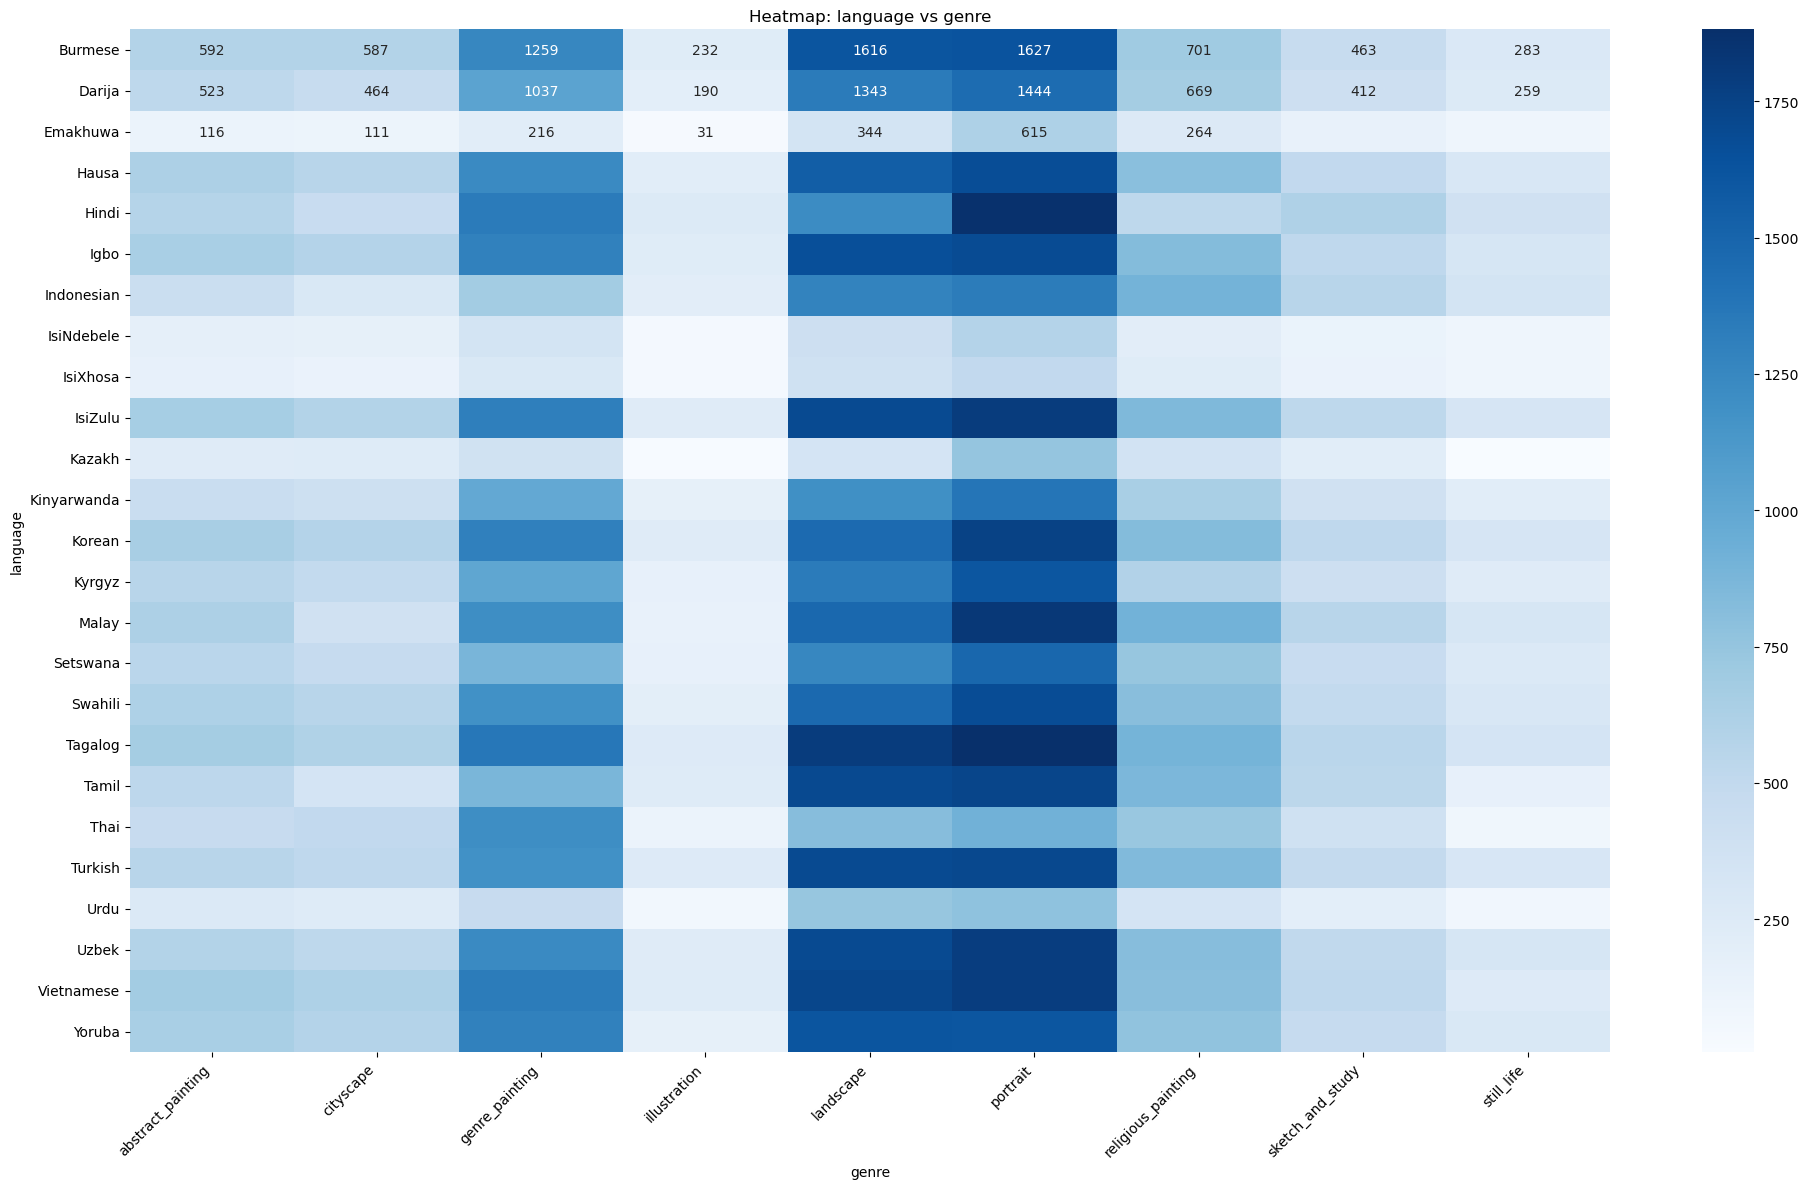

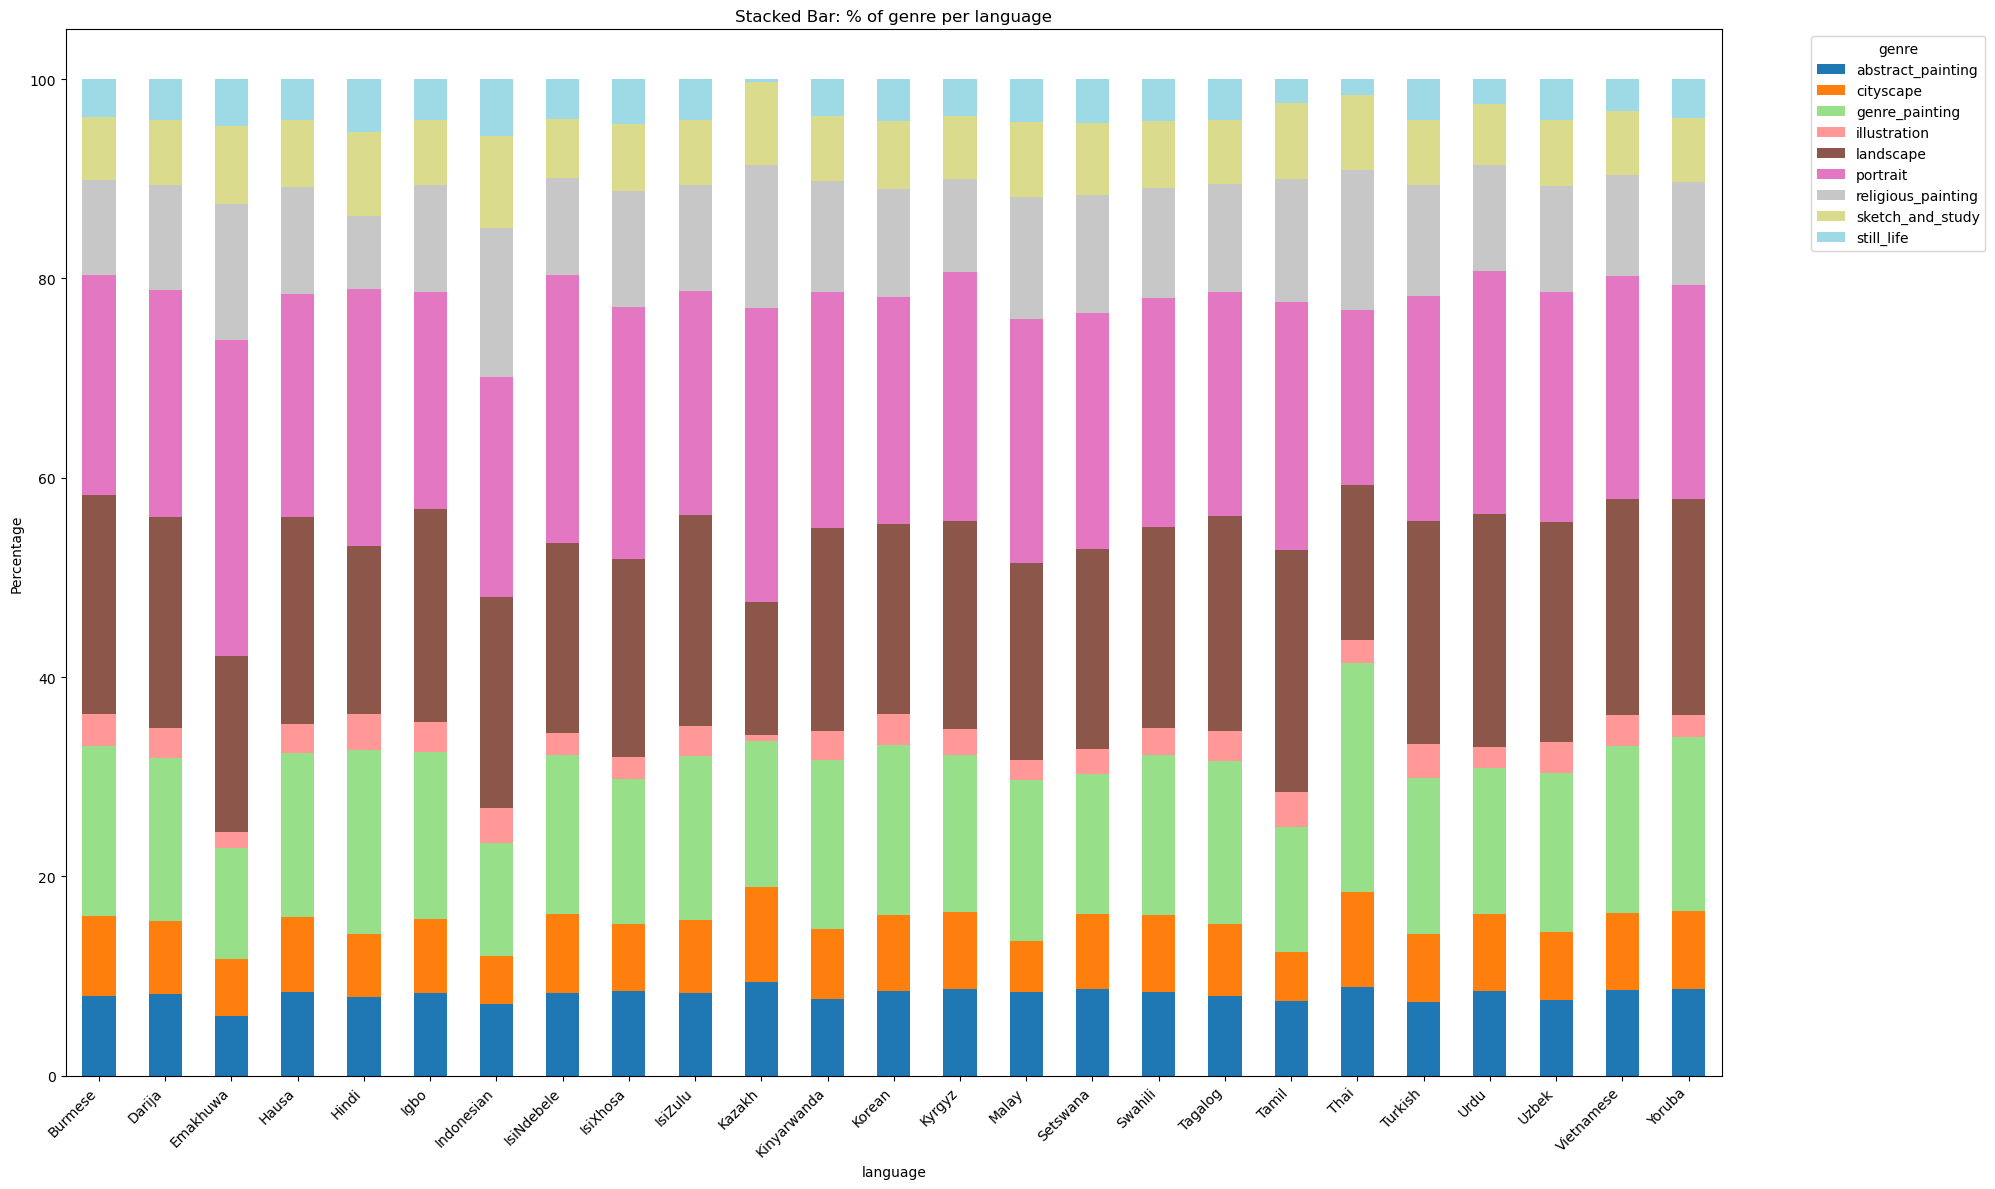

In [35]:
explore_bivariate(ds,'language', 'genre')

- Genre painting dominates with a high count in languages like Hindi and Indonesian 
- This contributes to a notable imbalance in genre distribution across languages, with genre painting and landscape painting being most commonly associated with well-represented languages
- Still life is the least represented genre in languages like Urdu and Uzbek (by percentage)
- Landscape painting is most frequently associated with languages such as Hindi and Swahili

#### art_style vs Emotion


-- Exploring: art_style vs emotion --


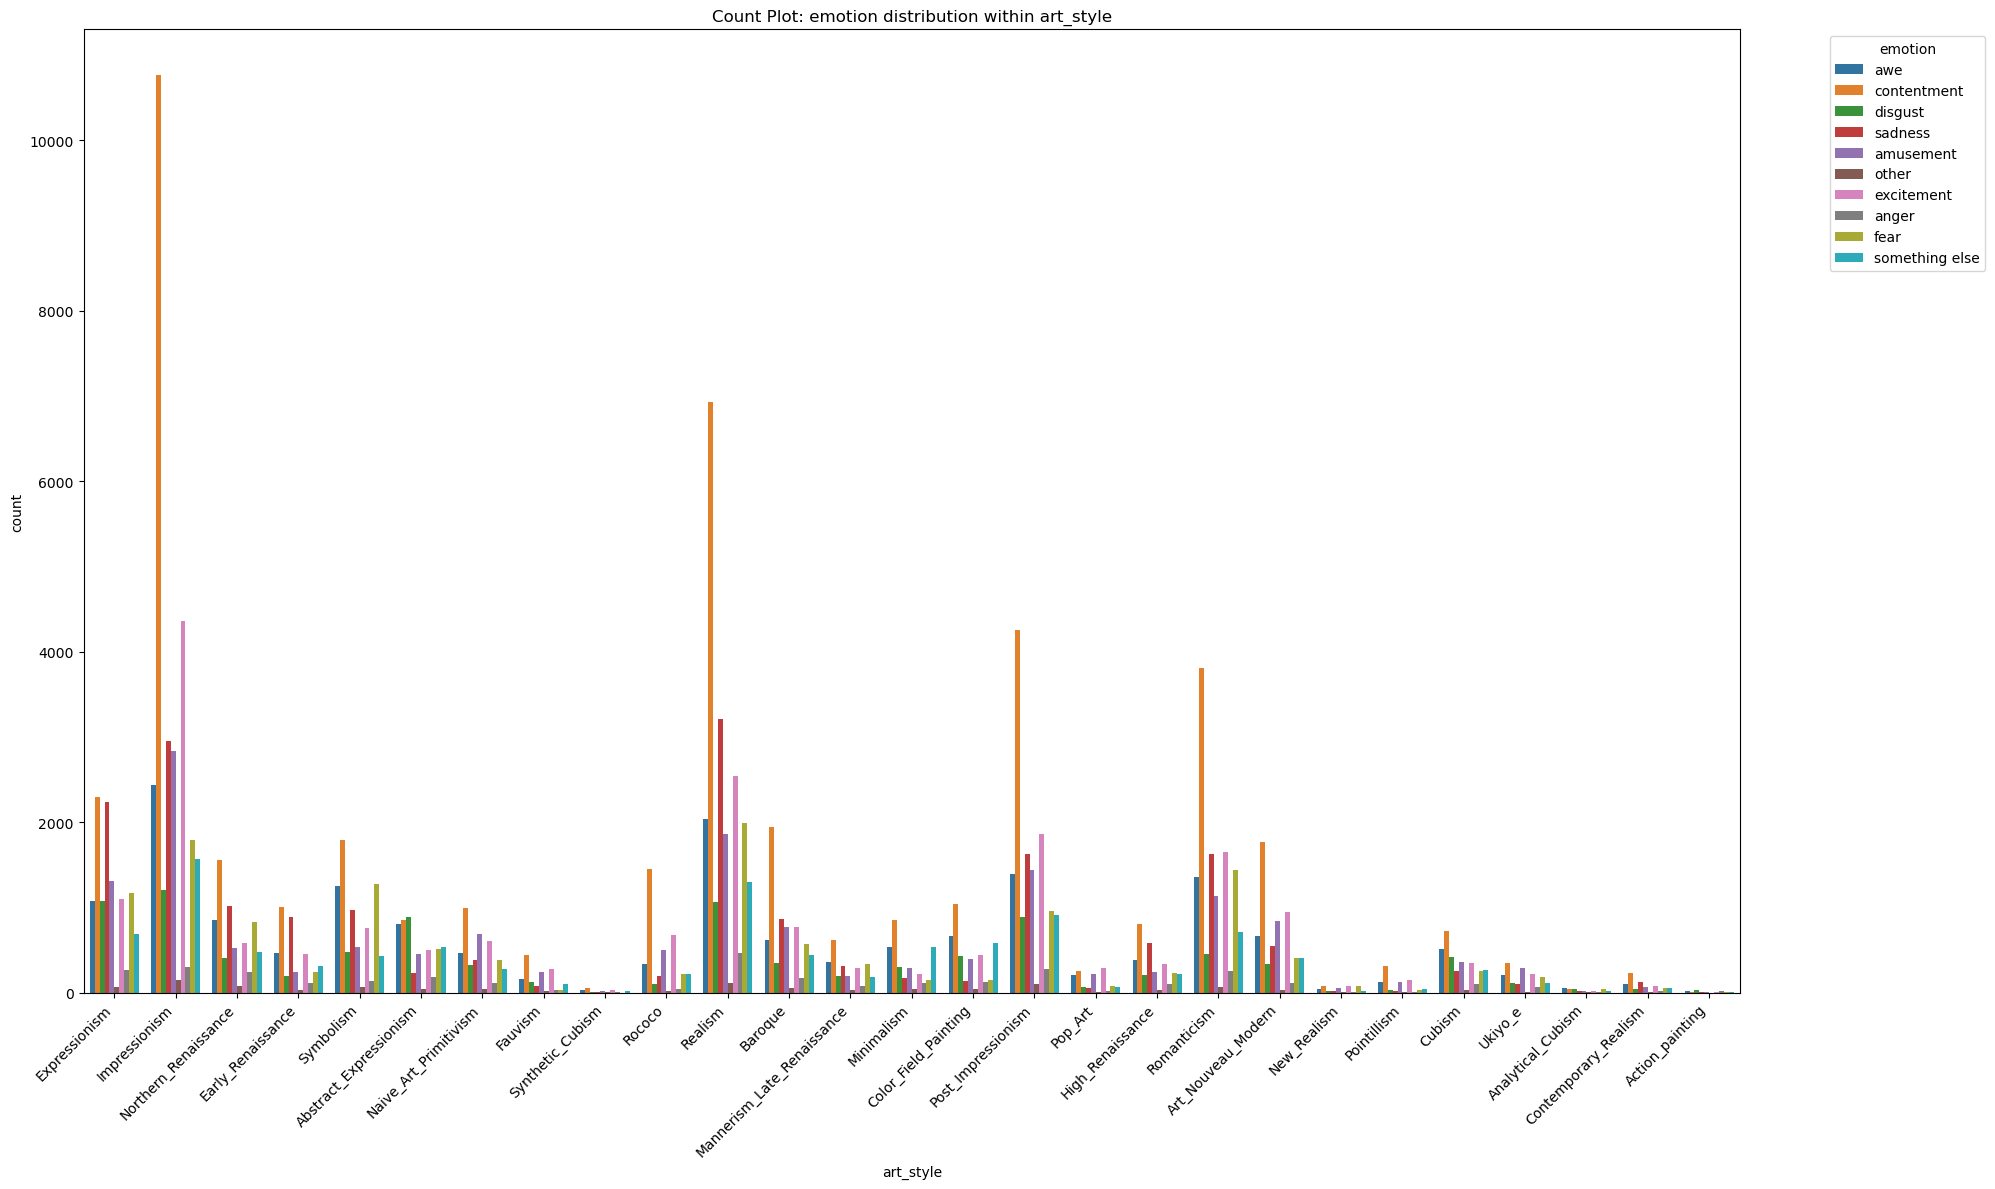

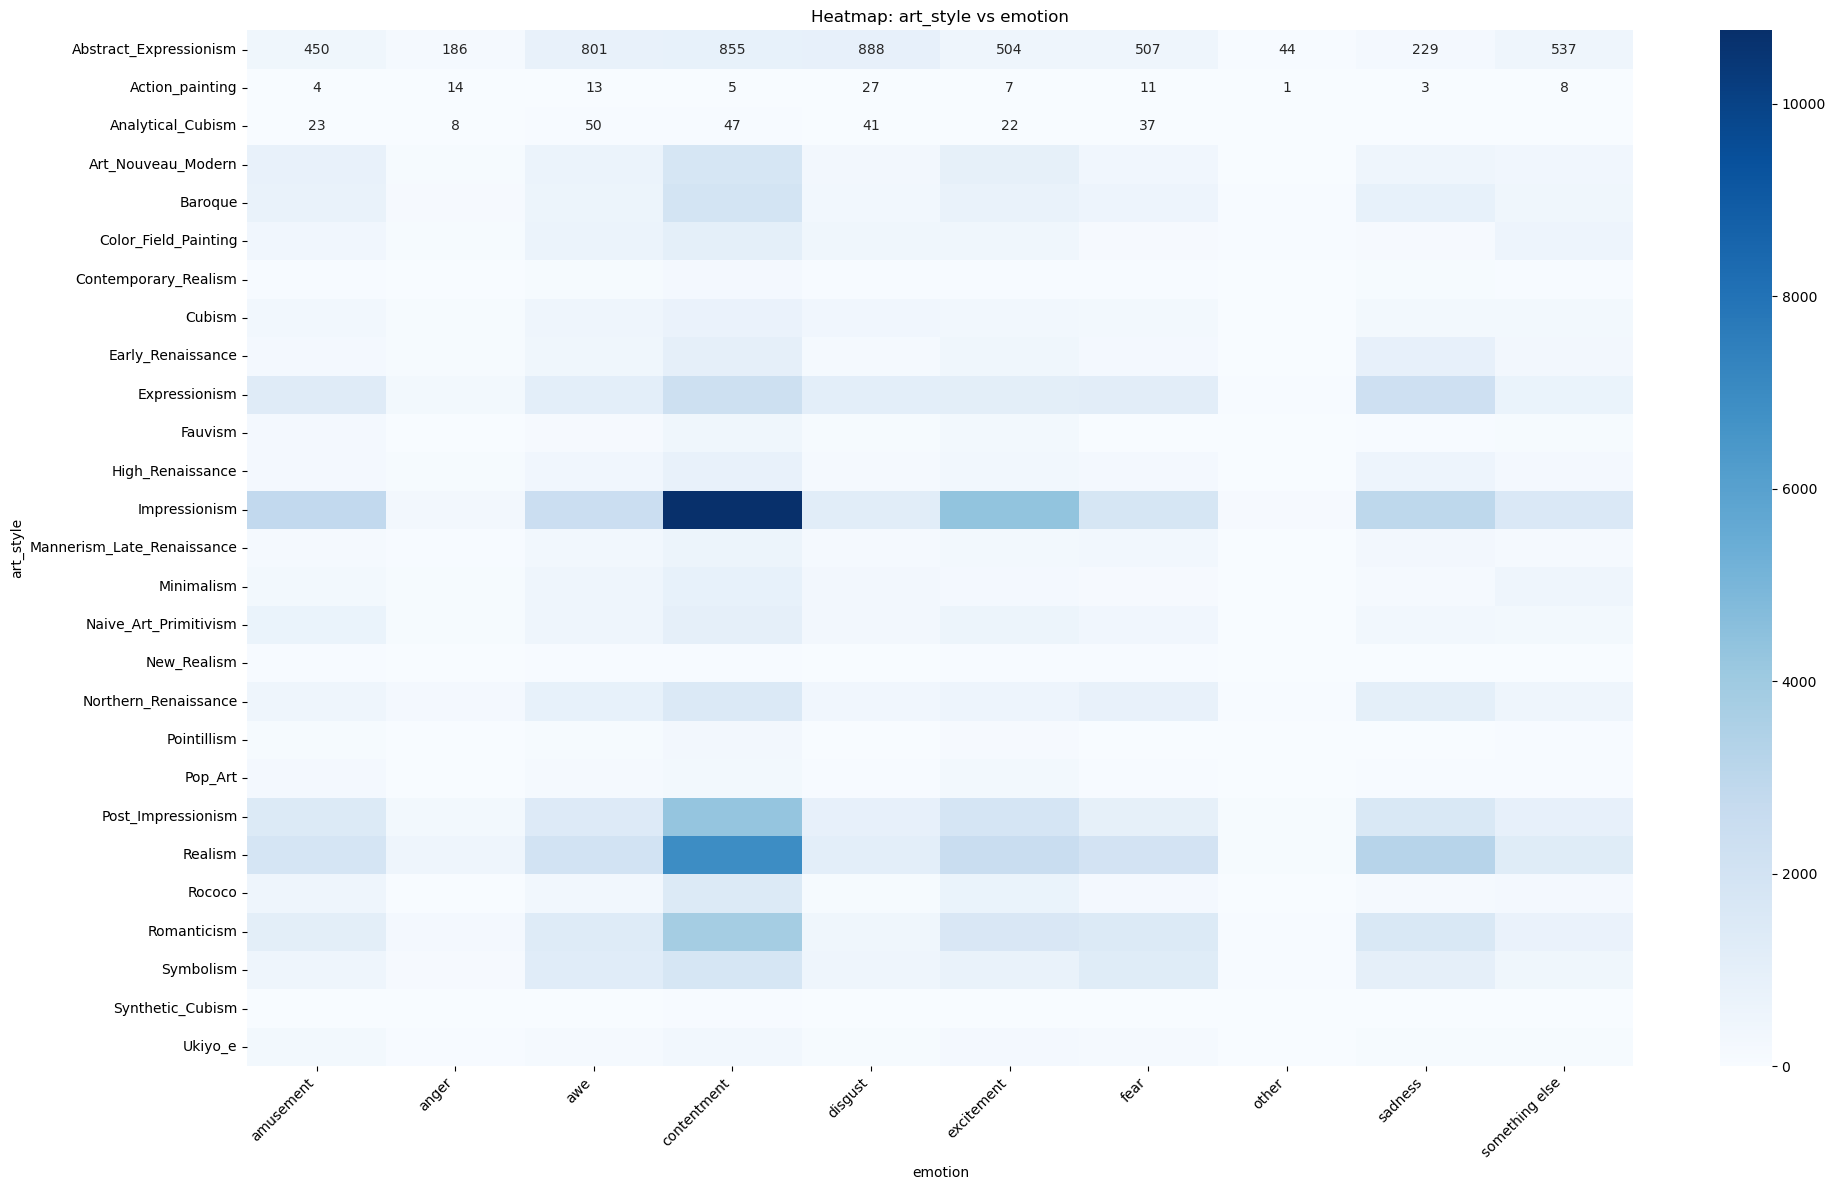

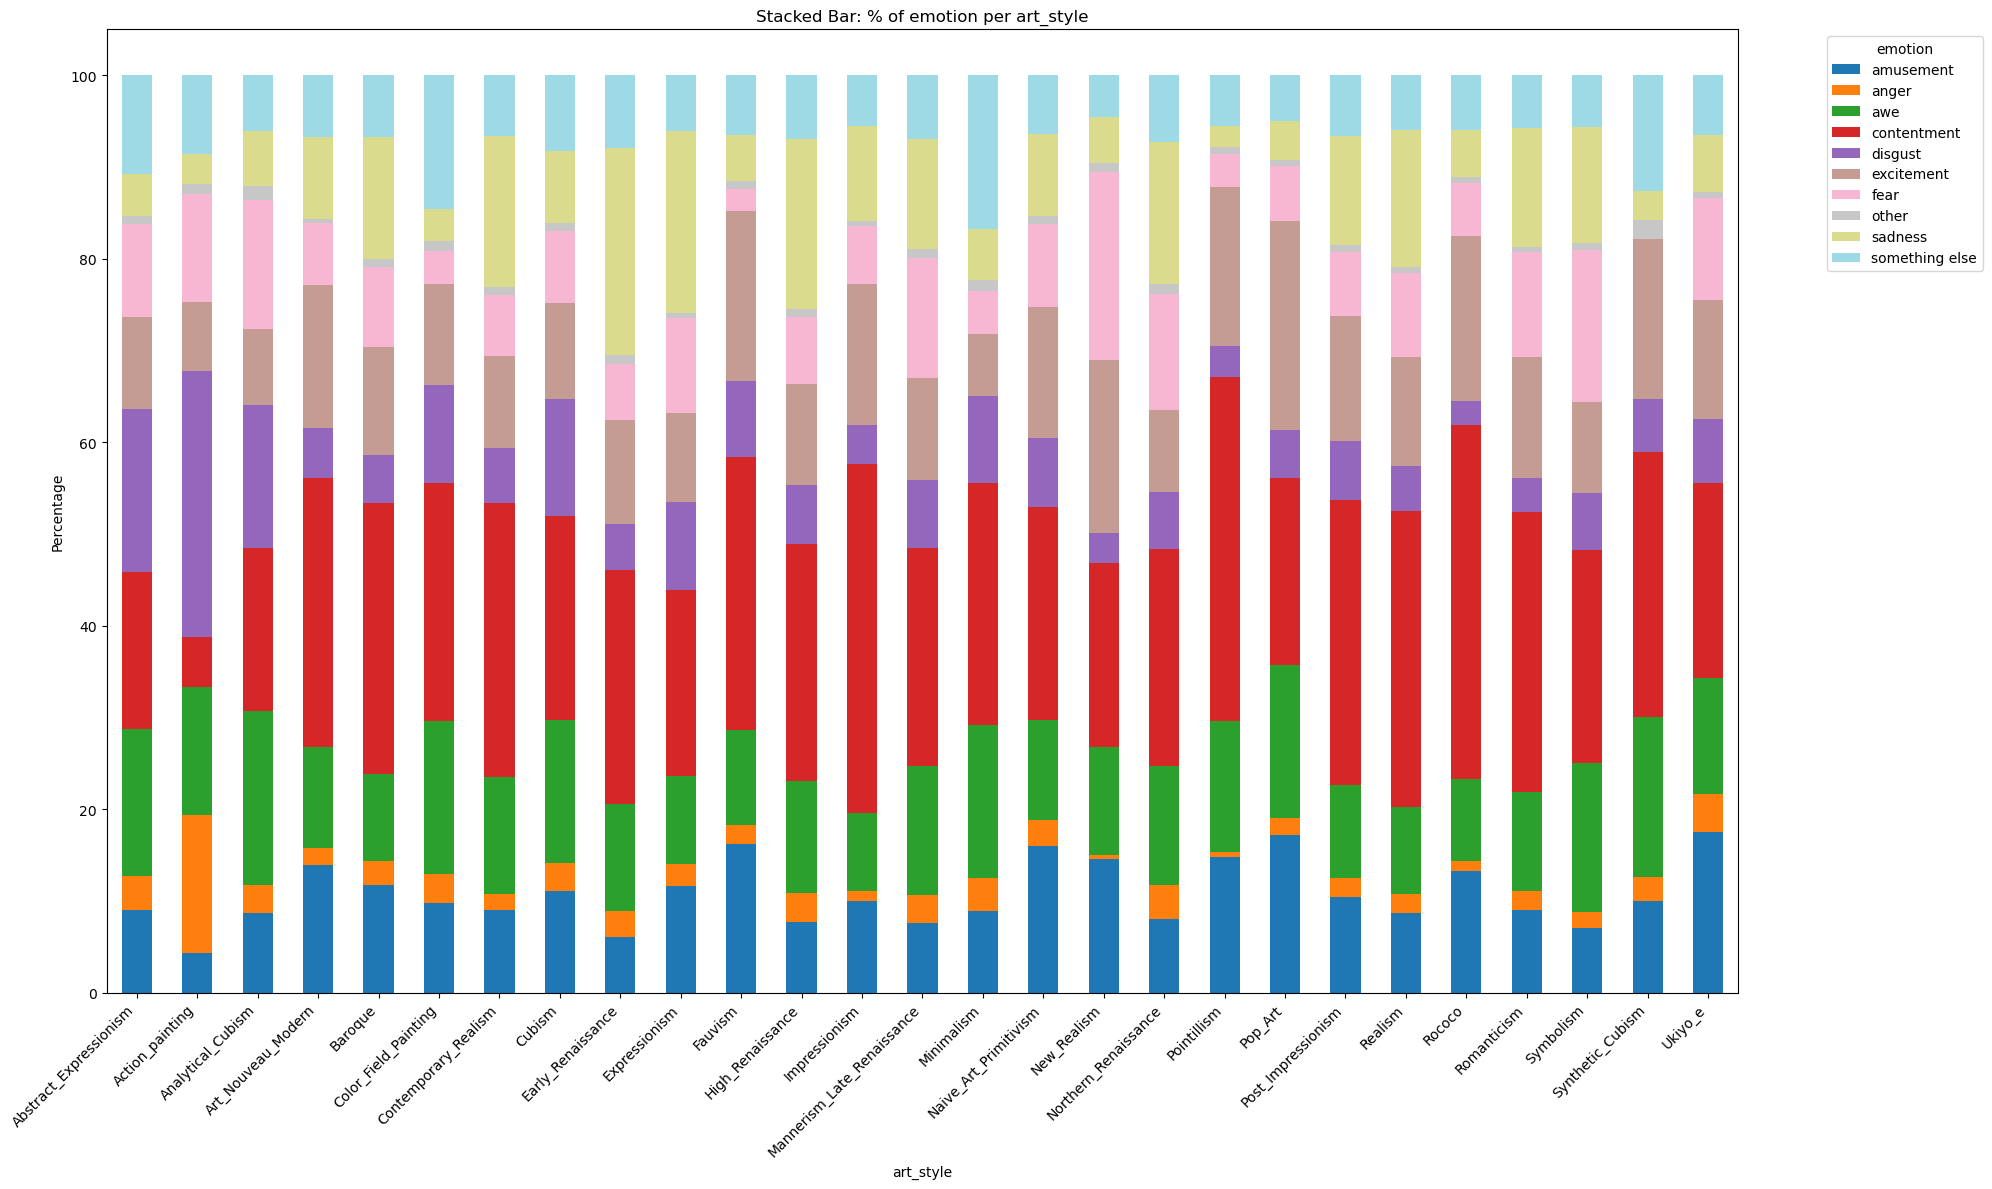

In [37]:
explore_bivariate(ds,'art_style', 'emotion')

- Impressionism dominates with a high count in emotions like sadness and something else

- This contributes to a notable imbalance in emotional distribution across art styles, with sadness and something else being most commonly associated with well-represented styles

- Excitement is the least represented emotion in art styles like Minimalism and Rococo (by percentage)

- Sadness is most frequently associated with art styles such as Impressionism and Realism

#### Language vs Emotion


-- Exploring: language vs emotion --


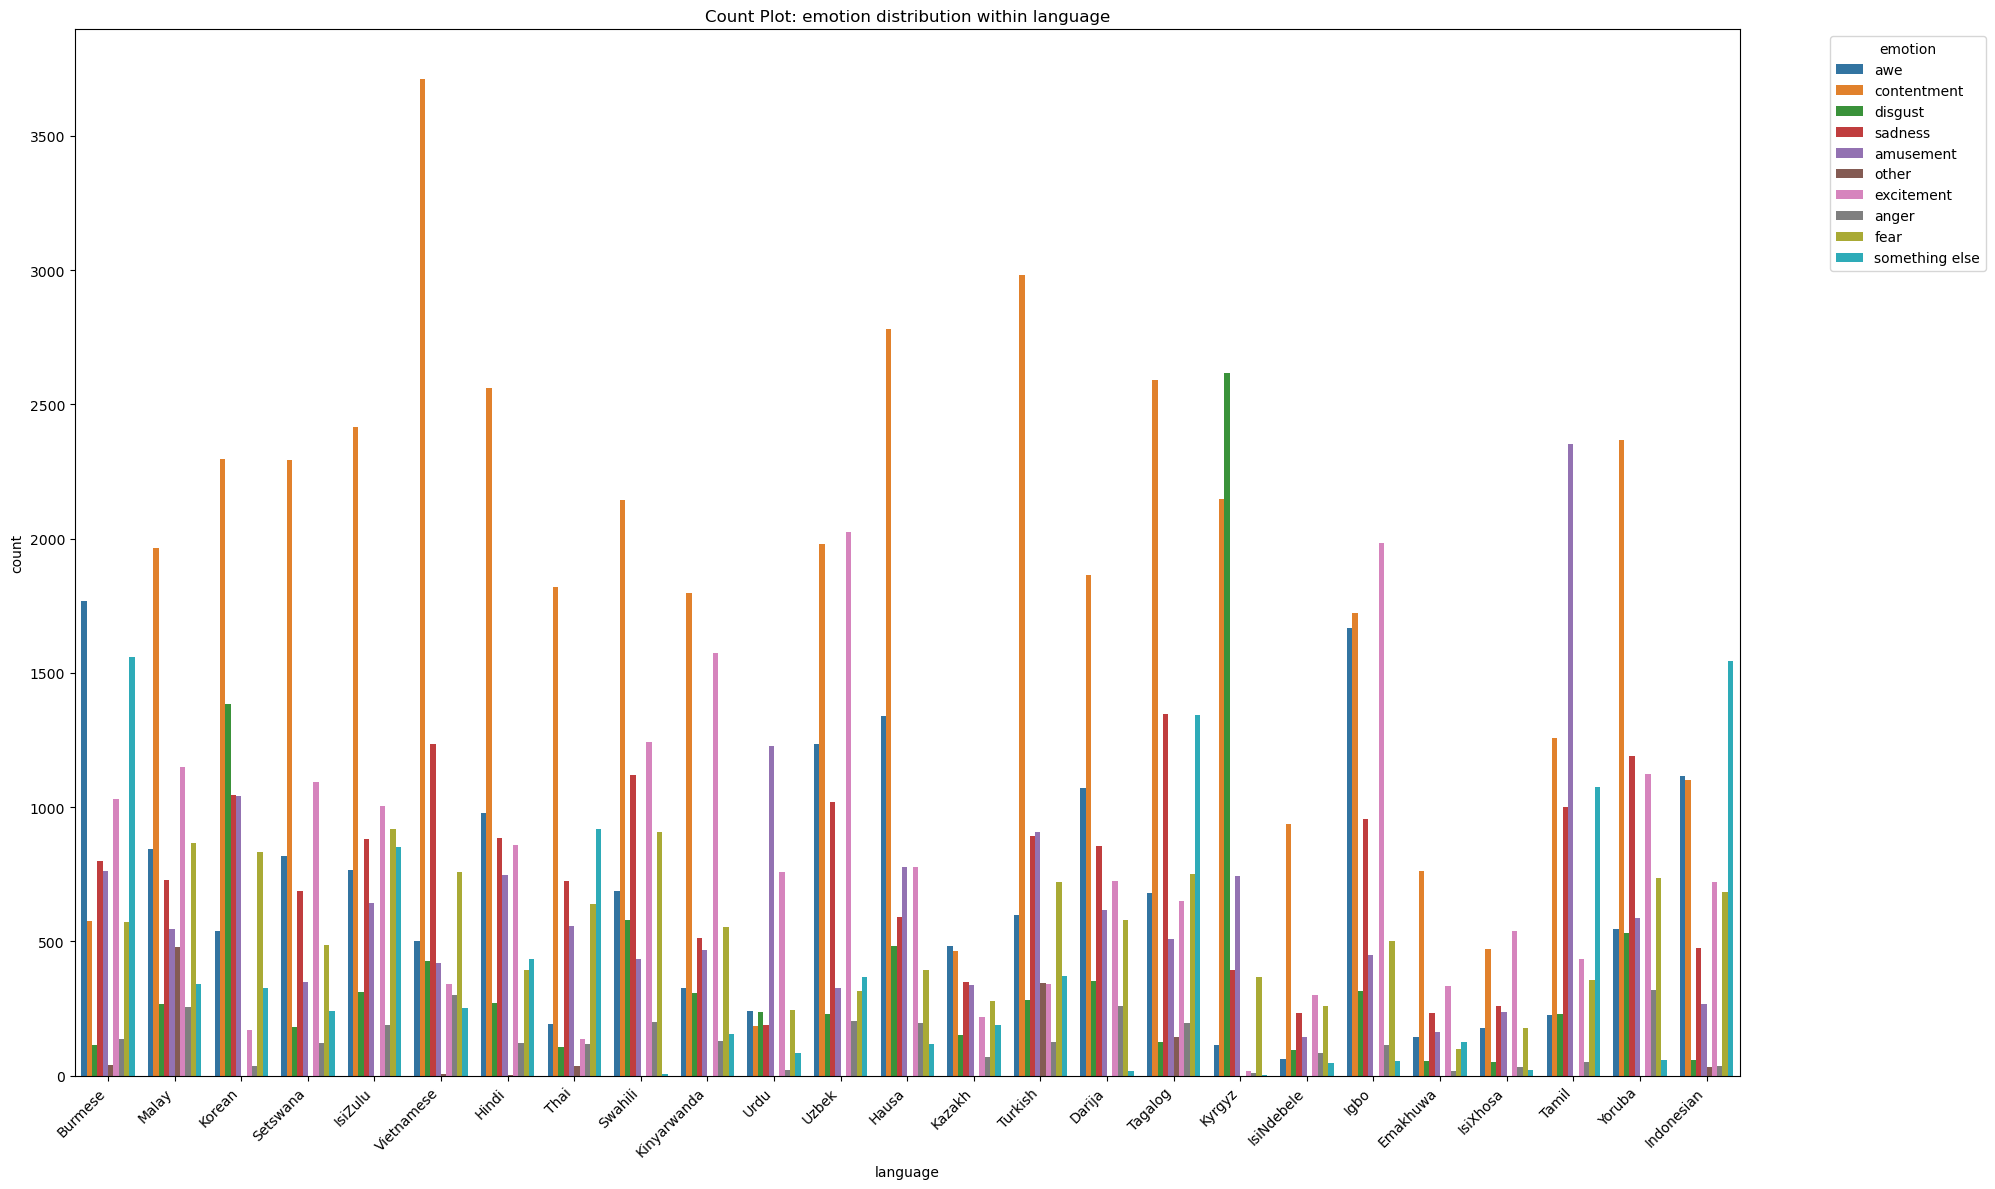

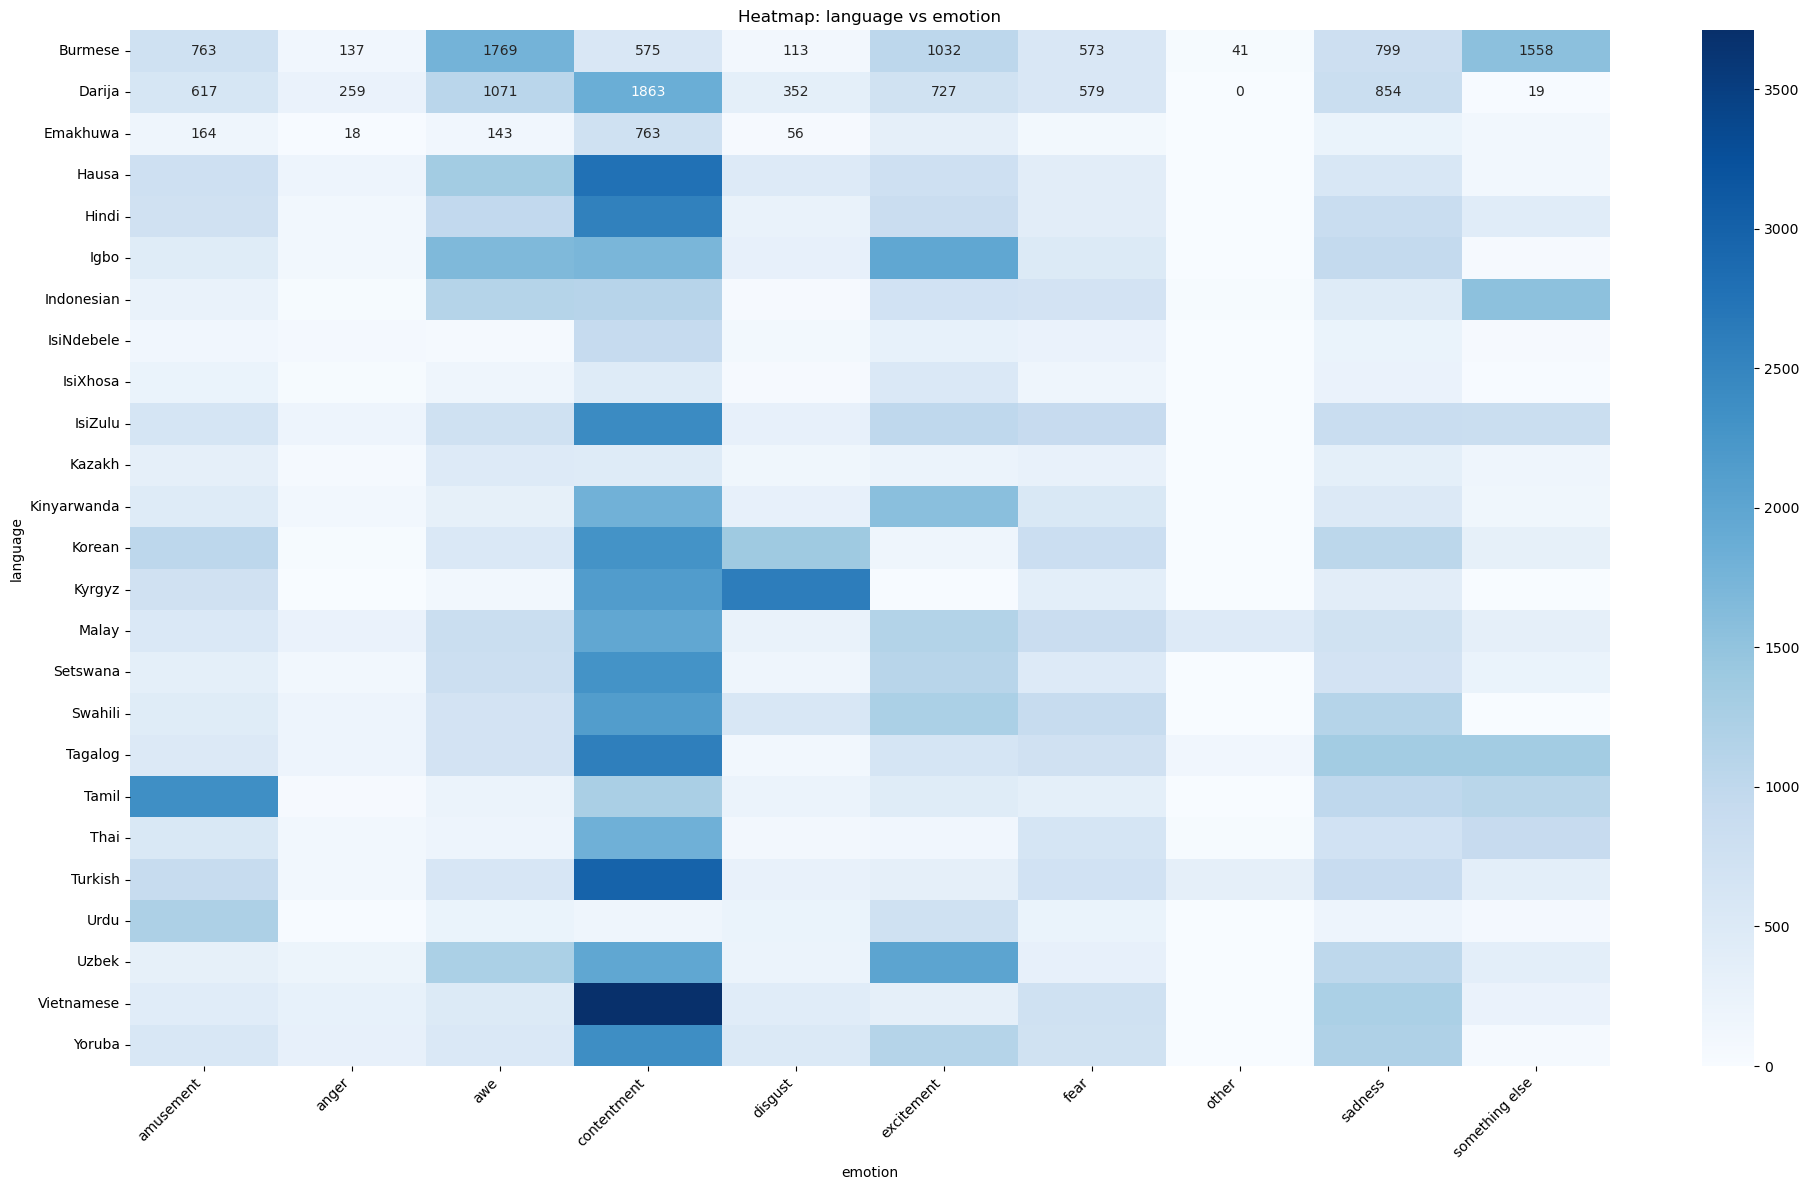

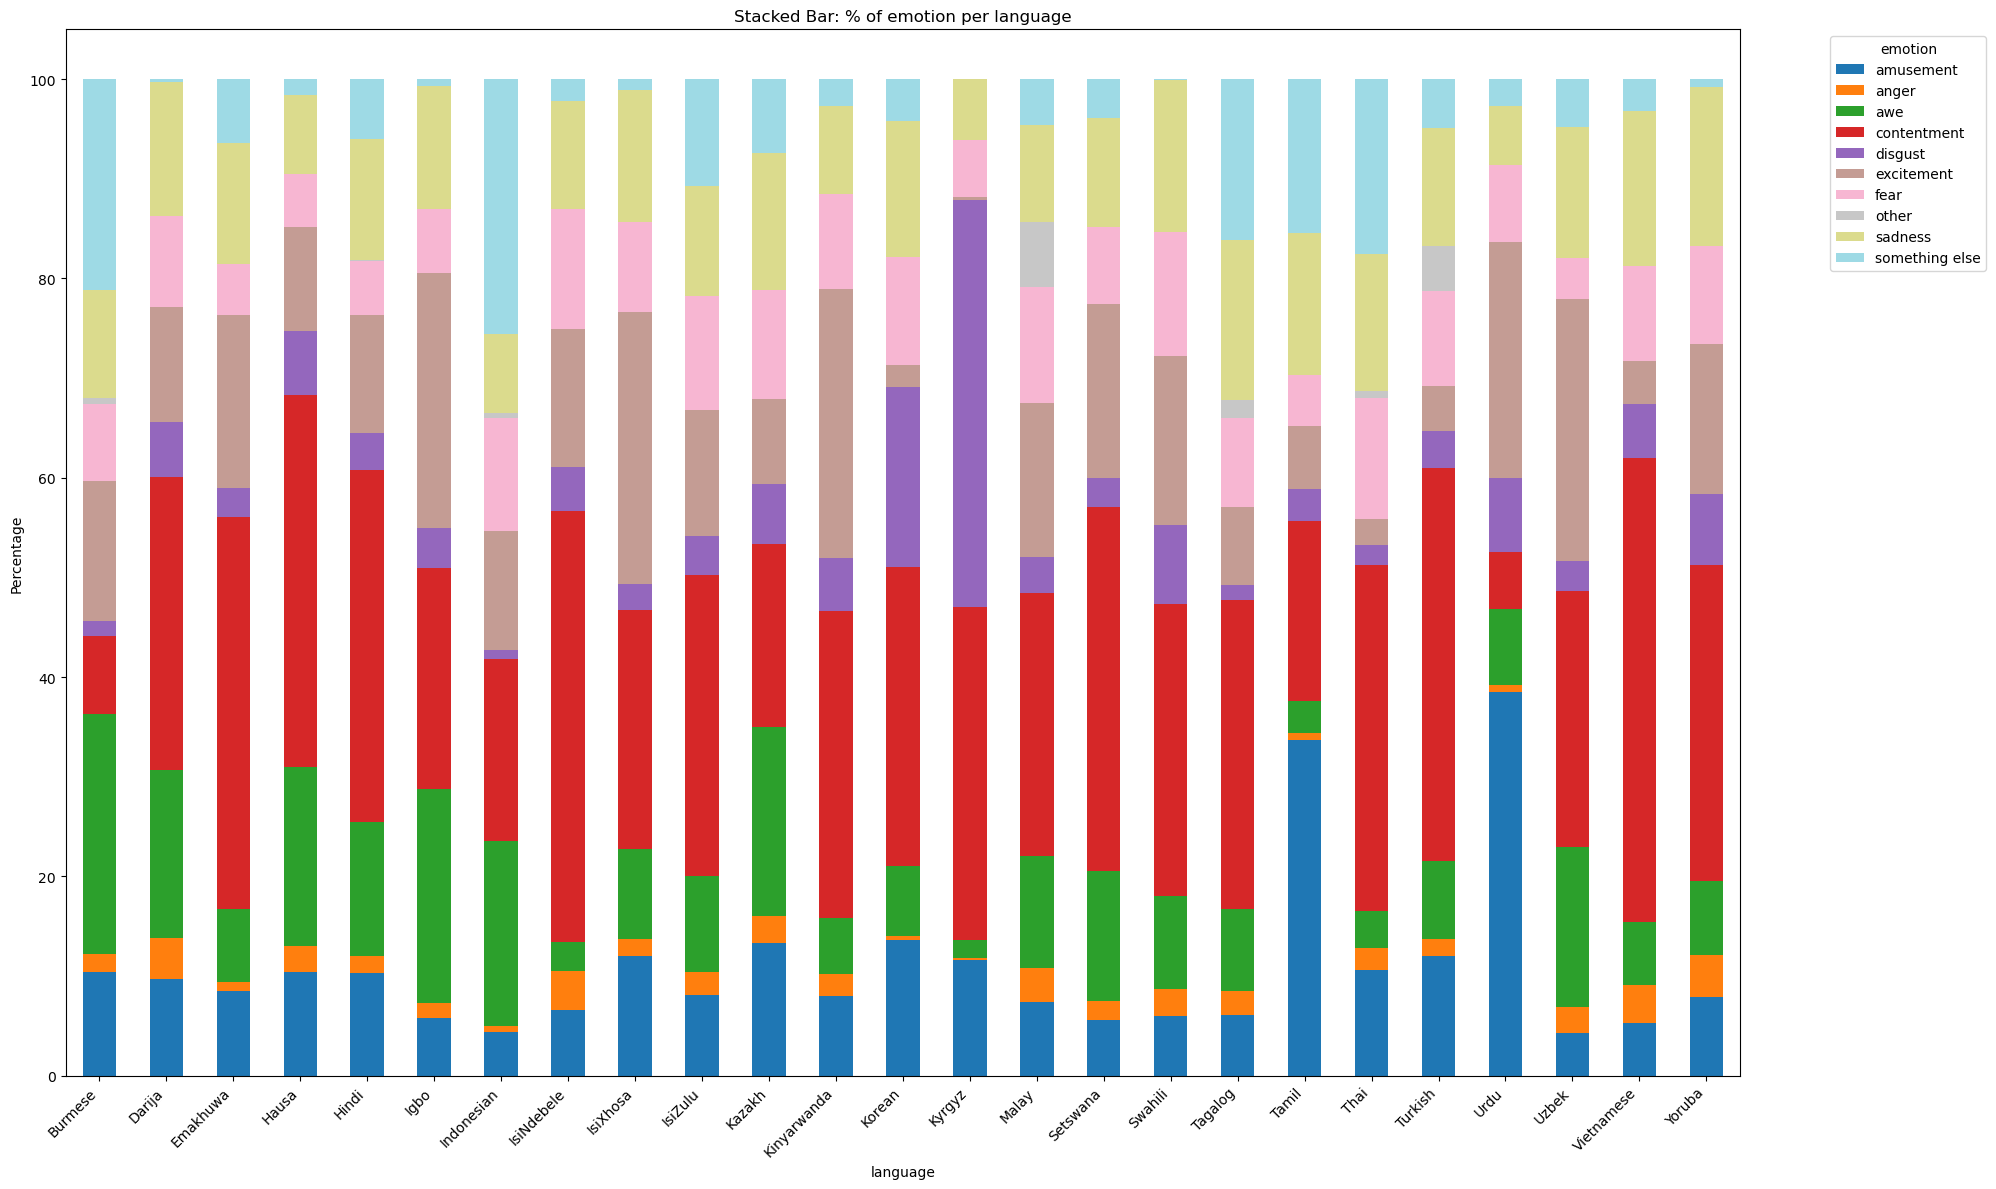

In [ ]:
explore_bivariate(ds,'language', 'emotion')

- Awe dominates emotion distribution with a high count in languages like Indonesian
- This contributes to a notable imbalance in emotion distribution across languages, with awe and contentment being most commonly associated with well-represented languages
- Something else is the least represented emotion in languages like Emakhwa and Kyrgyz (by percentage)
- Awe is most frequently associated with languages such as Indonesian and Burmese